In [12]:
pip install  google_images_download imutils imageio opencv-python keras tensorflow matplotlib tqdm simple_image_download

     |████████████████████████████████| 334 kB 330 kB/s eta 0:00:01
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12075 sha256=60ee6d2ede61bac919211732aa5ae1416cd6983f573f0c6d19e734a74bb7fe55
  Stored in directory: /Users/zuri/Library/Caches/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar
Note: you may need to restart the kernel to use updated packages.


In [71]:
from google_images_download import google_images_download
from simple_image_download import simple_image_download as simp
import os
import imutils
import imageio
import csv
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

## Download Images from Google

In [16]:
hair_types = [ "4C Black Hair", "2A Hair"]

for type in hair_types:
    response = simp.simple_image_download
    images = response().download(type, 500)
    print(response().urls(type, 500))

    

[========================================================================] 100%
[========================================================================] 100%


['https://i.pinimg.com/736x/e3/e9/9b/e3e99b67b8d20d253202fc7fc4dd15ad.jpg', 'https://img.huffingtonpost.com/asset/5cd648bd2500005600a5501f.jpeg?ops', 'https://www.essence.com/wp-content/uploads/2016/12/image/2016/12/main/screen_shot_2016-12-08_at_1.37.29_pm.png', 'https://i.pinimg.com/originals/ad/75/a7/ad75a79ef0d4f5428e306f2aeea9197d.png', 'https://diana-cdn.naturallycurly.com/Articles2.0/448WfMjwDe8zWY970cDauj/contentImages/e3b6c105572d09d0c12ac0a1a6d37f94/untitled-design-29.jpg', 'https://thatsisterimages.s3.amazonaws.com/wp-content/uploads/2016/08/17114410/4A-hair-example3.jpg', 'https://diana-cdn.naturallycurly.com/Articles2.0/5h3iFMItSIJ93oVaYdh2aT/contentImages/678c8af66562affc2acd79de4cb19724/lenisha-1.jpg', 'https://www.essence.com/wp-content/uploads/2017/01/1484322589/Fro-Shrinkage.jpg', 'https://media.allure.com/photos/5e8db80d4c65780008e979e0/1:1/w_1092,h_1092,c_limit/lupita-nyongo-afro.jpg', 'https://img.huffingtonpost.com/asset/5cd648bd2100003100c4a0f3.jpeg?ops', 'https:

[========================================================================] 100%


['https://i.pinimg.com/originals/ea/9e/87/ea9e87559b775bd74b40321b88c9d414.png', 'https://media.glamour.com/photos/5f6a2ea43d95eae315aa79b4/master/w_1600%2Cc_limit/embed_graph_FINAL.jpg', 'https://i.pinimg.com/originals/0c/2e/ee/0c2eee3905ef22a214526b970eb4a240.jpg', 'https://i.redd.it/7h6ypsl93v551.jpg', 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/hair-types-1585686067.png?resize', 'https://i.ytimg.com/vi/S_nvLWBzdVk/maxresdefault.jpg', 'https://mk0kurlify4pneyjcten.kinstacdn.com/wp-content/uploads/2020/04/Wat-is-mijn-krultype.png', 'https://support.myrevair.com/hc/article_attachments/360024559074/Type-2A-Before-After.jpg', 'https://cdn.shopify.com/s/files/1/0248/6688/1610/files/2type-BA-comp.jpg?8505', 'https://i.redd.it/a4pf1wv1cks01.png', 'https://i.ytimg.com/vi/SCIR-JsuZKI/maxresdefault.jpg', 'https://ath.unileverservices.com/wp-content/uploads/sites/4/2017/10/a1151b855bebf26b2cefd71c6e12c4aa-curly-hair-types-curl-types-1-e1507045737182.jpg', 'https://i.pinimg.co

## Clean Images from Google

In [33]:
two_a_image_path = "./simple_images/2A_Hair"
two_a_process_image_path = "./train_images/2A_Hair"
four_c_image_path = "./simple_images/4C_Black_Hair"
four_c_process_image_path = "./train_images/4C_Hair"

In [40]:
# process 2A Hair
for image in os.listdir(two_a_image_path):
    image_path = os.path.join(two_a_image_path, image)
    cv_image = cv2.imread(image_path,1)
    if cv_image is None:
        continue
    resized_image = imutils.resize(cv_image, width=1280)
    two_a_train_image_path = os.path.join(two_a_process_image_path, 'train_image_' + image)
    imageio.imwrite(two_a_train_image_path, resized_image)
    
with open('./csv/2AHair.csv', 'w') as csvfile:
    for image_path in os.listdir(two_a_image_path):
        filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
        if image_path == '.DS_Store':
            continue
        create_row = [image_path, '2ahair']
        filewriter.writerow(create_row)
        

In [34]:
# process 4C Hair
for image in os.listdir(four_c_image_path):
    image_path = os.path.join(four_c_image_path, image)
    cv_image = cv2.imread(image_path,1)
    if cv_image is None:
        continue
    resized_image = imutils.resize(cv_image, width=1280)
    four_c_train_image_path = os.path.join(four_c_process_image_path, 'train_image_' + image)
    imageio.imwrite(four_c_train_image_path, resized_image)
    
with open('./csv/4CHair.csv', 'w') as csvfile:
    for image_path in os.listdir(four_c_image_path):
        filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
        if image_path == '.DS_Store':
            continue
        create_row = [image_path, '4chair']
        filewriter.writerow(create_row)        
    

# Build Model

In [110]:
# Load Training Data
train2a = pd.read_csv('./csv/2AHair.csv') # Had to manually insert headers [id,label]
print(train2a.head)
train4c = pd.read_csv('./csv/4CHair.csv') # Had to manually insert headers [id,label]
print(train4c.head)

<bound method NDFrame.head of                    id   label
0    2A Hair_226.jpeg  2ahair
1    2A Hair_363.jpeg  2ahair
2    2A Hair_271.jpeg  2ahair
3     2A Hair_243.png  2ahair
4     2A Hair_59.jpeg  2ahair
..                ...     ...
495  2A Hair_435.jpeg  2ahair
496   2A Hair_272.png  2ahair
497  2A Hair_120.jpeg  2ahair
498  2A Hair_198.jpeg  2ahair
499  2A Hair_177.jpeg  2ahair

[500 rows x 2 columns]>
<bound method NDFrame.head of                          id   label
0     4C Black Hair_460.png  4chair
1     4C Black Hair_474.png  4chair
2    4C Black Hair_354.jpeg  4chair
3    4C Black Hair_211.jpeg  4chair
4    4C Black Hair_138.jpeg  4chair
..                      ...     ...
495  4C Black Hair_269.jpeg  4chair
496   4C Black Hair_451.png  4chair
497   4C Black Hair_445.png  4chair
498  4C Black Hair_140.jpeg  4chair
499  4C Black Hair_455.jpeg  4chair

[500 rows x 2 columns]>


In [158]:
training_sets = [(train4c, '4C_Hair'), (train2a, '2A_Hair') ] # Array of Tuples (contents, filename) 
# (train2a, '2A_Hair')

# Take Images and convert into array
train_image = []
for train, directory_name in training_sets:
    for i in tqdm(range(train.shape[0])):
        img = image.load_img(f'train_images/{directory_name}/train_image_' + train['id'][i], target_size=(256, 256), color_mode='rgb')
        img = image.img_to_array(img) # Converts it into PIL (Python Image Library)
        print(img)
        img = img/255
        train_image.append(img)



  0%|          | 2/500 [00:00<00:38, 12.98it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 ...

 [[ 23.  20.  19.]
  [ 23.  20.  19.]
  [ 25.  22.  21.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[ 24.  21.  20.]
  [ 24.  21.  20.]
  [ 23.  21.  20.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[ 26.  23.  22.]
  [ 28.  27.  25.]
  [ 27.  24.  23.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]]]
[[[ 96. 112. 119.]
  [ 99. 116. 119.]
  [102. 118. 124.]
  ...
  [ 97. 113. 119.]
  [ 97. 113. 119.]
  [ 95. 114. 119.]]

 [[ 96. 112. 119.]
  [ 99. 116. 120.]
  [102. 118. 124.]
  ...
  [ 96. 112. 118.]
  [ 96. 112. 118.]
  [ 93. 112. 117.]]

 [[ 96. 110. 120.]

  3%|▎         | 14/500 [00:00<00:11, 41.76it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 ...

 [[144. 127. 161.]
  [160. 157. 168.]
  [  3.   0.  14.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[139. 114. 154.]
  [ 84.  83.  91.]
  [117. 109. 130.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[222. 195. 238.]
  [244. 244. 252.]
  [  4.   0.  21.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[250. 250. 250.]
  [250. 250. 250.]
  [250. 250. 250.]
  ...
  [236. 240. 241.]
  [238. 242. 243.]
  [238. 242. 243.]]

 [[250. 250. 250.]
  [250. 250. 250.]
  [251. 251. 251.]
  ...
  [235. 239. 240.]
  [237. 241. 242.]
  [237. 241. 242.]]

 [[250. 250. 250.]

  5%|▍         | 24/500 [00:00<00:12, 37.75it/s]

[[[220. 224. 229.]
  [238. 247. 255.]
  [217. 230. 238.]
  ...
  [234. 244. 251.]
  [232. 243. 247.]
  [234. 243. 252.]]

 [[218. 227. 227.]
  [228. 241. 249.]
  [224. 235. 243.]
  ...
  [232. 242. 249.]
  [233. 244. 248.]
  [234. 243. 253.]]

 [[208. 221. 224.]
  [224. 240. 248.]
  [235. 246. 253.]
  ...
  [224. 234. 241.]
  [233. 245. 248.]
  [231. 239. 249.]]

 ...

 [[173. 161. 162.]
  [198. 193. 194.]
  [197. 204. 209.]
  ...
  [164. 128. 110.]
  [155. 119. 101.]
  [170. 136. 119.]]

 [[155. 143. 144.]
  [190. 185. 186.]
  [197. 203. 208.]
  ...
  [152. 116.  98.]
  [159. 123. 105.]
  [147. 115.  94.]]

 [[175. 162. 163.]
  [178. 174. 174.]
  [198. 204. 209.]
  ...
  [147. 111.  93.]
  [154. 118. 100.]
  [136. 104.  81.]]]
[[[124. 124. 124.]
  [126. 126. 126.]
  [128. 128. 128.]
  ...
  [ 91.  93.  92.]
  [ 95.  97.  96.]
  [ 95.  97.  96.]]

 [[124. 124. 124.]
  [126. 126. 126.]
  [128. 128. 128.]
  ...
  [ 93.  95.  94.]
  [ 95.  97.  96.]
  [ 95.  97.  96.]]

 [[122. 122. 122.]

  7%|▋         | 34/500 [00:00<00:11, 40.88it/s]

[[[212. 204. 193.]
  [211. 203. 192.]
  [211. 203. 192.]
  ...
  [175. 166. 157.]
  [179. 170. 161.]
  [176. 167. 158.]]

 [[212. 204. 193.]
  [214. 206. 195.]
  [214. 206. 195.]
  ...
  [179. 170. 161.]
  [174. 165. 156.]
  [176. 167. 158.]]

 [[214. 206. 195.]
  [214. 206. 195.]
  [214. 206. 195.]
  ...
  [177. 168. 159.]
  [177. 168. 159.]
  [178. 169. 160.]]

 ...

 [[253. 248. 245.]
  [253. 248. 245.]
  [253. 248. 245.]
  ...
  [238. 229. 224.]
  [238. 229. 224.]
  [238. 229. 224.]]

 [[254. 249. 246.]
  [254. 249. 246.]
  [253. 248. 245.]
  ...
  [239. 230. 225.]
  [239. 230. 225.]
  [237. 228. 223.]]

 [[254. 249. 246.]
  [254. 249. 246.]
  [253. 248. 245.]
  ...
  [239. 230. 225.]
  [239. 230. 225.]
  [237. 228. 223.]]]
[[[249. 249. 249.]
  [247. 247. 247.]
  [247. 247. 247.]
  ...
  [248. 248. 248.]
  [249. 249. 249.]
  [247. 247. 247.]]

 [[249. 249. 249.]
  [247. 247. 247.]
  [247. 247. 247.]
  ...
  [248. 248. 248.]
  [247. 247. 247.]
  [247. 247. 247.]]

 [[249. 249. 249.]

  9%|▉         | 46/500 [00:01<00:09, 48.58it/s]

[[[212. 204. 193.]
  [211. 203. 192.]
  [211. 203. 192.]
  ...
  [175. 166. 157.]
  [179. 170. 161.]
  [176. 167. 158.]]

 [[212. 204. 193.]
  [214. 206. 195.]
  [214. 206. 195.]
  ...
  [179. 170. 161.]
  [174. 165. 156.]
  [176. 167. 158.]]

 [[214. 206. 195.]
  [214. 206. 195.]
  [214. 206. 195.]
  ...
  [177. 168. 159.]
  [177. 168. 159.]
  [178. 169. 160.]]

 ...

 [[253. 248. 245.]
  [253. 248. 245.]
  [253. 248. 245.]
  ...
  [238. 229. 224.]
  [238. 229. 224.]
  [238. 229. 224.]]

 [[254. 249. 246.]
  [254. 249. 246.]
  [253. 248. 245.]
  ...
  [239. 230. 225.]
  [239. 230. 225.]
  [237. 228. 223.]]

 [[254. 249. 246.]
  [254. 249. 246.]
  [253. 248. 245.]
  ...
  [239. 230. 225.]
  [239. 230. 225.]
  [237. 228. 223.]]]
[[[110. 161. 188.]
  [110. 161. 188.]
  [110. 161. 188.]
  ...
  [120. 157. 176.]
  [122. 158. 174.]
  [124. 157. 172.]]

 [[110. 162. 184.]
  [110. 162. 184.]
  [110. 162. 184.]
  ...
  [118. 155. 174.]
  [119. 155. 171.]
  [121. 154. 169.]]

 [[112. 164. 185.]

 10%|█         | 51/500 [00:01<00:09, 48.29it/s]

[[[ 53.  60.  68.]
  [ 53.  60.  68.]
  [ 53.  60.  68.]
  ...
  [ 47.  54.  64.]
  [ 50.  57.  63.]
  [ 50.  58.  61.]]

 [[ 54.  61.  69.]
  [ 54.  61.  69.]
  [ 54.  61.  69.]
  ...
  [ 48.  55.  65.]
  [ 50.  57.  63.]
  [ 50.  58.  61.]]

 [[ 55.  62.  70.]
  [ 55.  62.  70.]
  [ 55.  62.  70.]
  ...
  [ 49.  56.  66.]
  [ 50.  57.  63.]
  [ 50.  58.  61.]]

 ...

 [[ 31.  50.  93.]
  [ 32.  56. 104.]
  [ 36.  66. 118.]
  ...
  [ 90.  93. 102.]
  [ 91.  94.  99.]
  [ 91.  95.  98.]]

 [[ 33.  54.  99.]
  [ 36.  59. 109.]
  [ 40.  65. 121.]
  ...
  [ 90.  92. 104.]
  [ 91.  94. 101.]
  [ 90.  93.  98.]]

 [[ 33.  54.  99.]
  [ 36.  59. 109.]
  [ 35.  60. 116.]
  ...
  [ 91.  93. 105.]
  [ 92.  95. 102.]
  [ 89.  92.  97.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 12%|█▏        | 61/500 [00:01<00:11, 37.61it/s]

[[[193. 198. 194.]
  [203. 208. 198.]
  [203. 206. 199.]
  ...
  [223. 228. 213.]
  [219. 224. 209.]
  [218. 223. 209.]]

 [[201. 206. 198.]
  [201. 203. 197.]
  [201. 204. 197.]
  ...
  [216. 220. 207.]
  [222. 226. 213.]
  [217. 222. 207.]]

 [[200. 204. 198.]
  [203. 205. 199.]
  [202. 204. 198.]
  ...
  [217. 222. 207.]
  [222. 226. 213.]
  [219. 224. 209.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[ 69.  80.  74.]
  [ 68.  81.  74.]
  [ 68.  85.  77.]
  ...
  [186. 182. 171.]
  [182. 173. 164.]
  [175. 165. 156.]]

 [[ 68.  81.  74.]
  [ 66.  81.  74.]
  [ 68.  85.  77.]
  ...
  [179. 175. 164.]
  [172. 163. 154.]
  [165. 155. 146.]]

 [[ 66.  81.  74.]

 13%|█▎        | 66/500 [00:01<00:12, 34.71it/s]

[[[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [233. 239. 239.]
  [233. 239. 239.]
  [233. 239. 239.]]

 [[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [234. 240. 240.]
  [233. 239. 239.]
  [233. 239. 239.]]

 [[234. 240. 240.]
  [234. 240. 240.]
  [234. 240. 240.]
  ...
  [235. 241. 241.]
  [234. 240. 240.]
  [234. 240. 240.]]

 ...

 [[234. 240. 240.]
  [234. 240. 240.]
  [234. 240. 240.]
  ...
  [ 99.  99.  99.]
  [233. 233. 233.]
  [255. 255. 255.]]

 [[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [147. 147. 147.]
  [241. 241. 241.]
  [255. 255. 255.]]

 [[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [250. 250. 250.]
  [254. 254. 254.]
  [254. 254. 254.]]]
[[[10. 13. 46.]
  [ 8. 11. 44.]
  [ 8. 11. 44.]
  ...
  [15. 18. 49.]
  [15. 18. 49.]
  [17. 20. 51.]]

 [[ 8. 11. 44.]
  [ 8. 11. 44.]
  [ 7. 10. 43.]
  ...
  [15. 18. 49.]
  [15. 18. 49.]
  [17. 20. 51.]]

 [[10. 13. 46.]
  [10. 13. 46.]
  [ 9. 12. 45.]
  ...


 16%|█▌        | 79/500 [00:01<00:09, 45.69it/s]

[[[237. 237. 237.]
  [237. 237. 237.]
  [237. 237. 237.]
  ...
  [152. 164. 162.]
  [155. 167. 165.]
  [163. 175. 173.]]

 [[237. 237. 237.]
  [237. 237. 237.]
  [237. 237. 237.]
  ...
  [152. 164. 162.]
  [155. 167. 165.]
  [160. 172. 170.]]

 [[237. 237. 237.]
  [237. 237. 237.]
  [237. 237. 237.]
  ...
  [154. 166. 164.]
  [159. 171. 169.]
  [164. 176. 174.]]

 ...

 [[132. 121. 119.]
  [135. 124. 122.]
  [123. 112. 110.]
  ...
  [106.  92.  91.]
  [114. 100.  99.]
  [116. 102. 101.]]

 [[133. 122. 120.]
  [136. 125. 123.]
  [131. 120. 118.]
  ...
  [103.  87.  87.]
  [115.  99.  99.]
  [109.  93.  93.]]

 [[135. 124. 120.]
  [135. 124. 120.]
  [127. 116. 112.]
  ...
  [104.  86.  84.]
  [115.  97.  95.]
  [111.  93.  91.]]]
[[[  7.  26.  59.]
  [  6.  26.  61.]
  [  4.  28.  66.]
  ...
  [  7.  79. 151.]
  [  7.  75. 148.]
  [  8.  74. 148.]]

 [[  7.  26.  59.]
  [  6.  26.  61.]
  [  4.  28.  66.]
  ...
  [  9.  81. 153.]
  [  7.  75. 148.]
  [  8.  74. 148.]]

 [[  5.  24.  57.]

 17%|█▋        | 84/500 [00:02<00:10, 40.70it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 ...

 [[ 23.  20.  19.]
  [ 23.  20.  19.]
  [ 25.  22.  21.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[ 24.  21.  20.]
  [ 24.  21.  20.]
  [ 23.  21.  20.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[ 26.  23.  22.]
  [ 28.  27.  25.]
  [ 27.  24.  23.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]]]
[[[228. 239. 245.]
  [226. 237. 243.]
  [225. 236. 242.]
  ...
  [190. 219. 227.]
  [195. 219. 229.]
  [197. 219. 230.]]

 [[228. 239. 245.]
  [226. 237. 243.]
  [225. 236. 242.]
  ...
  [190. 219. 227.]
  [195. 219. 229.]
  [197. 219. 230.]]

 [[228. 239. 245.]

 19%|█▊        | 93/500 [00:02<00:11, 36.88it/s]

[[[146. 132. 149.]
  [147. 133. 150.]
  [144. 130. 147.]
  ...
  [125. 118. 136.]
  [126. 119. 137.]
  [126. 119. 137.]]

 [[146. 132. 149.]
  [147. 133. 150.]
  [144. 130. 147.]
  ...
  [124. 117. 135.]
  [126. 119. 137.]
  [126. 119. 137.]]

 [[145. 131. 148.]
  [148. 134. 151.]
  [143. 129. 146.]
  ...
  [125. 118. 136.]
  [126. 119. 137.]
  [126. 119. 137.]]

 ...

 [[125. 118. 136.]
  [127. 120. 138.]
  [128. 121. 139.]
  ...
  [122. 113. 134.]
  [122. 113. 134.]
  [122. 113. 134.]]

 [[127. 120. 138.]
  [126. 119. 137.]
  [125. 118. 136.]
  ...
  [122. 113. 134.]
  [121. 112. 133.]
  [120. 111. 132.]]

 [[126. 119. 137.]
  [124. 117. 135.]
  [123. 116. 134.]
  ...
  [124. 115. 136.]
  [123. 114. 135.]
  [121. 112. 133.]]]
[[[219. 211. 198.]
  [219. 211. 198.]
  [219. 211. 198.]
  ...
  [215. 207. 194.]
  [217. 209. 196.]
  [217. 209. 196.]]

 [[219. 211. 198.]
  [219. 211. 198.]
  [219. 211. 198.]
  ...
  [215. 207. 194.]
  [217. 209. 196.]
  [217. 209. 196.]]

 [[219. 211. 198.]

 20%|██        | 102/500 [00:02<00:10, 37.33it/s]

[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 ...

 [[254. 254. 252.]
  [254. 254. 252.]
  [254. 254. 252.]
  ...
  [166. 199. 204.]
  [163. 196. 201.]
  [157. 190. 195.]]

 [[254. 254. 252.]
  [254. 254. 252.]
  [254. 254. 252.]
  ...
  [163. 192. 198.]
  [161. 190. 196.]
  [159. 188. 194.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [252. 252. 252.]
  ...
  [164. 195. 200.]
  [154. 185. 190.]
  [159. 190. 195.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 22%|██▏       | 112/500 [00:02<00:10, 37.95it/s]

[[[193. 198. 194.]
  [203. 208. 198.]
  [203. 206. 199.]
  ...
  [223. 228. 213.]
  [219. 224. 209.]
  [218. 223. 209.]]

 [[201. 206. 198.]
  [201. 203. 197.]
  [201. 204. 197.]
  ...
  [216. 220. 207.]
  [222. 226. 213.]
  [217. 222. 207.]]

 [[200. 204. 198.]
  [203. 205. 199.]
  [202. 204. 198.]
  ...
  [217. 222. 207.]
  [222. 226. 213.]
  [219. 224. 209.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[212. 211. 209.]
  [212. 211. 209.]
  [212. 211. 209.]
  ...
  [215. 214. 212.]
  [215. 214. 212.]
  [215. 214. 212.]]

 [[212. 211. 209.]
  [212. 211. 209.]
  [212. 211. 209.]
  ...
  [215. 214. 212.]
  [215. 214. 212.]
  [215. 214. 212.]]

 [[212. 211. 209.]

 24%|██▎       | 118/500 [00:03<00:08, 42.51it/s]

[[[ 59.  70.  98.]
  [ 48.  59.  87.]
  [ 49.  60.  88.]
  ...
  [ 61.  70. 101.]
  [ 61.  70. 101.]
  [ 60.  69. 100.]]

 [[ 59.  70.  98.]
  [ 48.  59.  87.]
  [ 49.  60.  88.]
  ...
  [ 61.  70. 101.]
  [ 61.  70. 101.]
  [ 60.  69. 100.]]

 [[ 59.  70.  98.]
  [ 48.  59.  87.]
  [ 49.  60.  88.]
  ...
  [ 62.  71. 102.]
  [ 60.  69. 100.]
  [ 60.  69. 100.]]

 ...

 [[ 72.  90. 126.]
  [ 61.  79. 115.]
  [ 64.  82. 118.]
  ...
  [ 64.  83. 123.]
  [ 64.  83. 123.]
  [ 64.  83. 123.]]

 [[ 70.  88. 124.]
  [ 59.  77. 113.]
  [ 62.  80. 116.]
  ...
  [ 64.  83. 123.]
  [ 64.  83. 123.]
  [ 64.  83. 123.]]

 [[ 70.  88. 124.]
  [ 59.  77. 113.]
  [ 62.  80. 116.]
  ...
  [ 64.  83. 123.]
  [ 64.  83. 123.]
  [ 64.  83. 123.]]]
[[[222. 211. 193.]
  [222. 211. 193.]
  [223. 212. 194.]
  ...
  [228. 234. 234.]
  [224. 230. 230.]
  [223. 229. 229.]]

 [[222. 211. 193.]
  [222. 211. 193.]
  [223. 212. 194.]
  ...
  [229. 235. 235.]
  [226. 232. 232.]
  [224. 230. 230.]]

 [[219. 208. 190.]

 26%|██▌       | 129/500 [00:03<00:09, 39.02it/s]

[[[226. 160. 137.]
  [226. 159. 137.]
  [228. 162. 141.]
  ...
  [224. 153. 130.]
  [225. 153. 130.]
  [225. 154. 131.]]

 [[226. 161. 138.]
  [224. 158. 135.]
  [225. 160. 136.]
  ...
  [223. 152. 129.]
  [223. 152. 129.]
  [223. 152. 129.]]

 [[227. 161. 137.]
  [225. 159. 135.]
  [226. 160. 137.]
  ...
  [224. 153. 130.]
  [226. 155. 132.]
  [226. 155. 132.]]

 ...

 [[193. 120. 104.]
  [194. 121. 105.]
  [193. 120. 104.]
  ...
  [183. 109.  89.]
  [188. 114.  94.]
  [187. 113.  93.]]

 [[194. 121. 105.]
  [194. 122. 106.]
  [194. 122. 106.]
  ...
  [182. 109.  90.]
  [182. 108.  92.]
  [182. 109.  91.]]

 [[194. 121. 105.]
  [194. 121. 105.]
  [194. 121. 105.]
  ...
  [181. 108.  89.]
  [182. 108.  92.]
  [182. 108.  91.]]]
[[[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 22.  14.  69.]
  ...
  [106. 115. 119.]
  [104. 113. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 21.  14.  69.]
  ...
  [107. 116. 120.]
  [104. 112. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]

 28%|██▊       | 139/500 [00:03<00:08, 43.26it/s]

[[[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [209. 228. 235.]
  [210. 229. 236.]
  [210. 229. 236.]]

 [[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [208. 227. 234.]
  [209. 228. 235.]
  [209. 228. 235.]]

 [[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [208. 227. 234.]
  [207. 226. 233.]
  [207. 226. 233.]]

 ...

 [[206. 226. 235.]
  [206. 226. 235.]
  [205. 225. 234.]
  ...
  [153. 169. 169.]
  [199. 220. 225.]
  [198. 223. 230.]]

 [[206. 226. 235.]
  [206. 226. 235.]
  [205. 225. 234.]
  ...
  [ 91. 105. 106.]
  [201. 220. 226.]
  [202. 225. 233.]]

 [[206. 226. 235.]
  [206. 226. 235.]
  [205. 225. 234.]
  ...
  [ 66.  76.  78.]
  [190. 205. 212.]
  [205. 225. 234.]]]
[[[196. 181. 184.]
  [196. 181. 184.]
  [196. 181. 184.]
  ...
  [188. 173. 176.]
  [188. 173. 176.]
  [188. 173. 176.]]

 [[196. 181. 184.]
  [196. 181. 184.]
  [195. 180. 183.]
  ...
  [189. 174. 177.]
  [189. 174. 177.]
  [189. 174. 177.]]

 [[196. 181. 184.]

 29%|██▉       | 145/500 [00:03<00:08, 43.44it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 ...

 [[144. 127. 161.]
  [160. 157. 168.]
  [  3.   0.  14.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[139. 114. 154.]
  [ 84.  83.  91.]
  [117. 109. 130.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[222. 195. 238.]
  [244. 244. 252.]
  [  4.   0.  21.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[251. 251. 251.]
  [253. 253. 253.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[253. 253. 253.]
  [255. 255. 255.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[254. 254. 254.]

 31%|███       | 155/500 [00:03<00:09, 38.10it/s]

[[[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 ...

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]]
[[[ 66.  67.  61.]
  [ 67.  68.  62.]
  [ 66.  67.  61.]
  ...
  [ 68.  69.  63.]
  [ 68.  69.  63.]
  [ 67.  68.  62.]]

 [[ 66.  67.  61.]
  [ 68.  69.  63.]
  [ 67.  68.  62.]
  ...
  [ 70.  71.  65.]
  [ 68.  69.  63.]
  [ 66.  67.  61.]]

 [[ 66.  67.  61.]

 33%|███▎      | 166/500 [00:04<00:08, 41.47it/s]

[[[ 84.  91.  99.]
  [ 84.  91.  99.]
  [ 86.  93. 101.]
  ...
  [137. 151. 162.]
  [133. 147. 158.]
  [135. 149. 160.]]

 [[ 84.  90. 102.]
  [ 84.  90. 102.]
  [ 86.  92. 104.]
  ...
  [138. 150. 162.]
  [134. 146. 158.]
  [136. 148. 160.]]

 [[ 86.  92. 106.]
  [ 86.  92. 106.]
  [ 86.  92. 106.]
  ...
  [140. 150. 162.]
  [138. 148. 160.]
  [138. 148. 160.]]

 ...

 [[ 77.  77.  79.]
  [ 77.  77.  79.]
  [ 78.  78.  80.]
  ...
  [228. 228. 228.]
  [241. 241. 241.]
  [255. 255. 255.]]

 [[ 77.  77.  79.]
  [ 77.  77.  79.]
  [ 76.  76.  78.]
  ...
  [251. 251. 251.]
  [251. 251. 251.]
  [255. 255. 255.]]

 [[ 77.  77.  79.]
  [ 77.  77.  79.]
  [ 77.  77.  79.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[250. 250. 250.]
  [250. 250. 250.]
  [250. 250. 250.]
  ...
  [236. 240. 241.]
  [238. 242. 243.]
  [238. 242. 243.]]

 [[250. 250. 250.]
  [250. 250. 250.]
  [251. 251. 251.]
  ...
  [235. 239. 240.]
  [237. 241. 242.]
  [237. 241. 242.]]

 [[250. 250. 250.]

 34%|███▍      | 171/500 [00:04<00:08, 38.50it/s]

[[[212. 227. 234.]
  [198. 215. 222.]
  [196. 215. 221.]
  ...
  [182. 207. 212.]
  [179. 208. 212.]
  [171. 202. 205.]]

 [[206. 221. 228.]
  [197. 214. 221.]
  [208. 227. 233.]
  ...
  [182. 207. 212.]
  [180. 209. 213.]
  [172. 203. 206.]]

 [[203. 218. 225.]
  [205. 222. 229.]
  [206. 225. 231.]
  ...
  [183. 208. 213.]
  [180. 209. 213.]
  [171. 202. 205.]]

 ...

 [[ 72. 135. 114.]
  [ 96. 136. 125.]
  [100. 111. 113.]
  ...
  [ 58.  62.  73.]
  [ 64.  73.  88.]
  [ 61.  74.  91.]]

 [[ 73. 117. 104.]
  [ 82. 107. 103.]
  [118. 121. 126.]
  ...
  [ 59.  63.  72.]
  [ 57.  67.  77.]
  [ 65.  78.  94.]]

 [[ 88. 106. 108.]
  [ 81.  90.  97.]
  [123. 121. 134.]
  ...
  [ 63.  68.  74.]
  [ 54.  64.  74.]
  [ 63.  77.  90.]]]
[[[151. 162. 180.]
  [151. 162. 180.]
  [151. 162. 180.]
  ...
  [  5.   4.   0.]
  [  5.   4.   0.]
  [  5.   4.   0.]]

 [[151. 162. 180.]
  [153. 164. 182.]
  [152. 163. 181.]
  ...
  [  5.   4.   0.]
  [  5.   4.   0.]
  [  5.   4.   0.]]

 [[153. 164. 182.]

 36%|███▌      | 179/500 [00:04<00:09, 35.56it/s]

[[[196. 181. 184.]
  [196. 181. 184.]
  [196. 181. 184.]
  ...
  [188. 173. 176.]
  [188. 173. 176.]
  [188. 173. 176.]]

 [[196. 181. 184.]
  [196. 181. 184.]
  [195. 180. 183.]
  ...
  [189. 174. 177.]
  [189. 174. 177.]
  [189. 174. 177.]]

 [[196. 181. 184.]
  [196. 181. 184.]
  [197. 182. 185.]
  ...
  [190. 175. 178.]
  [190. 175. 178.]
  [190. 175. 178.]]

 ...

 [[ 95. 165. 225.]
  [ 93. 163. 223.]
  [ 92. 162. 222.]
  ...
  [ 89. 168. 235.]
  [ 95. 169. 234.]
  [100. 170. 230.]]

 [[ 95. 165. 225.]
  [ 93. 163. 223.]
  [ 92. 162. 222.]
  ...
  [ 89. 168. 235.]
  [ 96. 170. 235.]
  [ 99. 169. 229.]]

 [[ 96. 166. 226.]
  [ 94. 164. 224.]
  [ 93. 163. 223.]
  ...
  [ 97. 176. 243.]
  [ 98. 172. 237.]
  [ 99. 169. 229.]]]
[[[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [209. 228. 235.]
  [210. 229. 236.]
  [210. 229. 236.]]

 [[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [208. 227. 234.]
  [209. 228. 235.]
  [209. 228. 235.]]

 [[210. 229. 235.]

 38%|███▊      | 188/500 [00:04<00:08, 36.03it/s]

[[[251. 251. 251.]
  [253. 253. 253.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[253. 253. 253.]
  [255. 255. 255.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[182. 204. 229.]
  [182. 204. 229.]
  [181. 203. 228.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[177. 199. 224.]
  [185. 207. 232.]
  [183. 205. 230.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[188. 210. 235.]
  [188. 210. 235.]
  [187. 209. 234.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[ 37.  71. 132.]
  [ 44.  78. 139.]
  [ 47.  81. 142.]
  ...
  [150. 169. 173.]
  [149. 168. 172.]
  [146. 165. 169.]]

 [[ 36.  70. 131.]
  [ 53.  87. 148.]
  [ 41.  75. 136.]
  ...
  [149. 168. 172.]
  [149. 168. 172.]
  [146. 165. 169.]]

 [[ 42.  76. 137.]

 40%|███▉      | 198/500 [00:05<00:07, 42.23it/s]

[[[ 71.  85.  87.]
  [ 77.  94.  95.]
  [ 66.  86.  88.]
  ...
  [ 69.  93.  99.]
  [ 76. 100. 106.]
  [ 65.  85.  90.]]

 [[ 75.  89.  91.]
  [106. 125. 126.]
  [107. 128. 129.]
  ...
  [ 66.  90.  96.]
  [ 68.  93.  99.]
  [ 72.  92.  97.]]

 [[101. 114. 116.]
  [132. 150. 151.]
  [132. 152. 154.]
  ...
  [ 67.  91.  97.]
  [ 66.  91.  97.]
  [ 75.  96. 100.]]

 ...

 [[ 60.  77.  74.]
  [ 73.  89.  87.]
  [ 70.  86.  83.]
  ...
  [ 81. 103. 103.]
  [ 81. 105. 105.]
  [ 76. 103. 102.]]

 [[ 55.  68.  66.]
  [ 67.  80.  78.]
  [ 66.  80.  78.]
  ...
  [ 75. 103. 103.]
  [ 76. 104. 104.]
  [ 84. 105. 106.]]

 [[ 63.  72.  71.]
  [ 64.  73.  72.]
  [ 62.  70.  69.]
  ...
  [ 94. 108. 110.]
  [ 92. 107. 109.]
  [ 84.  96.  98.]]]
[[[188. 207. 237.]
  [186. 206. 239.]
  [176. 202. 225.]
  ...
  [ 97. 115. 119.]
  [ 97. 115. 119.]
  [ 97. 115. 119.]]

 [[185. 204. 234.]
  [183. 203. 236.]
  [175. 201. 224.]
  ...
  [ 97. 115. 119.]
  [ 97. 115. 119.]
  [ 97. 115. 119.]]

 [[190. 209. 239.]

 42%|████▏     | 209/500 [00:05<00:06, 46.29it/s]

[[[196. 181. 184.]
  [196. 181. 184.]
  [196. 181. 184.]
  ...
  [188. 173. 176.]
  [188. 173. 176.]
  [188. 173. 176.]]

 [[196. 181. 184.]
  [196. 181. 184.]
  [195. 180. 183.]
  ...
  [189. 174. 177.]
  [189. 174. 177.]
  [189. 174. 177.]]

 [[196. 181. 184.]
  [196. 181. 184.]
  [197. 182. 185.]
  ...
  [190. 175. 178.]
  [190. 175. 178.]
  [190. 175. 178.]]

 ...

 [[ 95. 165. 225.]
  [ 93. 163. 223.]
  [ 92. 162. 222.]
  ...
  [ 89. 168. 235.]
  [ 95. 169. 234.]
  [100. 170. 230.]]

 [[ 95. 165. 225.]
  [ 93. 163. 223.]
  [ 92. 162. 222.]
  ...
  [ 89. 168. 235.]
  [ 96. 170. 235.]
  [ 99. 169. 229.]]

 [[ 96. 166. 226.]
  [ 94. 164. 224.]
  [ 93. 163. 223.]
  ...
  [ 97. 176. 243.]
  [ 98. 172. 237.]
  [ 99. 169. 229.]]]
[[[255. 255. 242.]
  [238. 242. 254.]
  [147. 158. 203.]
  ...
  [138. 147. 180.]
  [238. 244. 255.]
  [239. 241. 240.]]

 [[210. 223. 255.]
  [ 79.  91. 163.]
  [ 43.  59. 155.]
  ...
  [ 44.  57. 125.]
  [ 45.  55. 104.]
  [223. 229. 255.]]

 [[ 66.  87. 154.]

 44%|████▍     | 220/500 [00:05<00:06, 44.33it/s]

[[[ 20.  22.  21.]
  [ 73.  75.  74.]
  [ 91.  93.  92.]
  ...
  [141. 142. 144.]
  [140. 141. 143.]
  [139. 140. 142.]]

 [[ 39.  41.  40.]
  [ 68.  70.  69.]
  [ 83.  85.  84.]
  ...
  [137. 138. 140.]
  [140. 141. 143.]
  [137. 138. 140.]]

 [[ 69.  71.  70.]
  [ 83.  85.  84.]
  [ 83.  85.  84.]
  ...
  [140. 141. 143.]
  [134. 135. 137.]
  [135. 136. 138.]]

 ...

 [[201. 139. 102.]
  [192. 130.  93.]
  [196. 134.  97.]
  ...
  [ 57.  62.  66.]
  [ 59.  69.  70.]
  [ 57.  69.  67.]]

 [[174. 117.  74.]
  [180. 123.  80.]
  [165. 108.  65.]
  ...
  [ 64.  69.  73.]
  [ 58.  68.  69.]
  [ 55.  67.  65.]]

 [[169. 115.  69.]
  [172. 118.  72.]
  [148.  94.  48.]
  ...
  [ 64.  69.  73.]
  [ 58.  68.  69.]
  [ 55.  67.  65.]]]
[[[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 22.  14.  69.]
  ...
  [106. 115. 119.]
  [104. 113. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 21.  14.  69.]
  ...
  [107. 116. 120.]
  [104. 112. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]

 45%|████▌     | 225/500 [00:05<00:07, 36.17it/s]

[[[106. 137. 151.]
  [ 93. 127. 141.]
  [103. 131. 146.]
  ...
  [170. 206. 224.]
  [177. 214. 232.]
  [175. 213. 231.]]

 [[ 97. 128. 143.]
  [ 91. 121. 137.]
  [104. 129. 144.]
  ...
  [175. 211. 229.]
  [175. 213. 231.]
  [177. 215. 233.]]

 [[101. 134. 149.]
  [ 96. 128. 145.]
  [107. 131. 148.]
  ...
  [176. 212. 230.]
  [172. 209. 227.]
  [171. 209. 227.]]

 ...

 [[119. 146. 192.]
  [ 93. 117. 163.]
  [103. 113. 144.]
  ...
  [ 34.  42.  51.]
  [ 36.  45.  50.]
  [ 36.  45.  49.]]

 [[110. 142. 175.]
  [106. 127. 168.]
  [ 99. 103. 128.]
  ...
  [ 50.  59.  64.]
  [ 47.  55.  60.]
  [ 40.  47.  51.]]

 [[123. 146. 180.]
  [107. 120. 150.]
  [108. 108. 125.]
  ...
  [ 45.  52.  55.]
  [ 46.  52.  57.]
  [ 47.  52.  56.]]]
[[[216. 209. 190.]
  [216. 209. 190.]
  [216. 209. 190.]
  ...
  [200. 193. 164.]
  [199. 192. 163.]
  [199. 192. 163.]]

 [[216. 209. 190.]
  [216. 209. 190.]
  [216. 209. 190.]
  ...
  [200. 193. 164.]
  [199. 192. 163.]
  [199. 192. 163.]]

 [[214. 212. 191.]

 47%|████▋     | 235/500 [00:05<00:06, 40.91it/s]

[[[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 22.  14.  69.]
  ...
  [106. 115. 119.]
  [104. 113. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 21.  14.  69.]
  ...
  [107. 116. 120.]
  [104. 112. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 21.  14.  69.]
  ...
  [107. 116. 120.]
  [104. 113. 117.]
  [102. 111. 115.]]

 ...

 [[  9.   6.  24.]
  [ 20.  18.  32.]
  [ 31.  31.  42.]
  ...
  [ 55.  54.  56.]
  [ 58.  54.  56.]
  [ 64.  60.  60.]]

 [[ 17.  17.  29.]
  [ 36.  35.  46.]
  [ 36.  37.  45.]
  ...
  [ 54.  53.  55.]
  [ 58.  53.  55.]
  [ 65.  60.  60.]]

 [[ 30.  30.  40.]
  [ 41.  41.  50.]
  [ 36.  37.  43.]
  ...
  [ 54.  52.  53.]
  [ 57.  53.  54.]
  [ 65.  60.  60.]]]
[[[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [248. 248. 250.]
  [247. 247. 249.]
  [252. 252. 254.]]

 [[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [248. 248. 250.]
  [247. 247. 249.]
  [252. 252. 254.]]

 [[248. 247. 252.]

 49%|████▉     | 245/500 [00:06<00:07, 34.28it/s]

[[[131. 130. 126.]
  [130. 128. 124.]
  [139. 137. 133.]
  ...
  [190. 180. 235.]
  [192. 184. 236.]
  [191. 184. 234.]]

 [[128. 128. 124.]
  [134. 131. 126.]
  [138. 135. 130.]
  ...
  [182. 171. 239.]
  [183. 172. 238.]
  [186. 176. 238.]]

 [[125. 124. 120.]
  [136. 133. 128.]
  [132. 129. 121.]
  ...
  [186. 175. 248.]
  [186. 176. 246.]
  [183. 175. 238.]]

 ...

 [[ 13.  23.  48.]
  [ 41.  55.  91.]
  [ 51.  70. 107.]
  ...
  [ 28.  33.  48.]
  [ 31.  35.  53.]
  [ 22.  26.  45.]]

 [[  6.   9.  31.]
  [ 21.  30.  59.]
  [ 41.  51.  84.]
  ...
  [ 25.  26.  37.]
  [ 28.  29.  42.]
  [ 26.  28.  43.]]

 [[  6.   7.  26.]
  [ 28.  32.  57.]
  [ 16.  22.  51.]
  ...
  [ 29.  28.  38.]
  [ 31.  30.  42.]
  [ 31.  31.  45.]]]
[[[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 22.  14.  69.]
  ...
  [106. 115. 119.]
  [104. 113. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]
  [ 22.  14.  69.]
  [ 21.  14.  69.]
  ...
  [107. 116. 120.]
  [104. 112. 117.]
  [102. 111. 115.]]

 [[ 21.  13.  66.]

 51%|█████     | 256/500 [00:06<00:05, 42.21it/s]

[[[  6.  10.   9.]
  [ 18.  22.  21.]
  [ 28.  32.  31.]
  ...
  [133. 138. 141.]
  [135. 140. 143.]
  [135. 140. 143.]]

 [[  5.   9.   8.]
  [ 20.  24.  23.]
  [ 35.  39.  38.]
  ...
  [133. 138. 142.]
  [133. 138. 142.]
  [133. 138. 142.]]

 [[  8.  12.  11.]
  [ 21.  25.  24.]
  [ 34.  38.  37.]
  ...
  [133. 137. 146.]
  [133. 137. 146.]
  [133. 137. 146.]]

 ...

 [[ 59.  60.  78.]
  [ 38.  41.  60.]
  [ 16.  23.  42.]
  ...
  [117. 116. 122.]
  [117. 116. 122.]
  [117. 116. 122.]]

 [[ 81.  84.  99.]
  [ 54.  61.  80.]
  [ 50.  57.  83.]
  ...
  [113. 114. 119.]
  [116. 117. 122.]
  [115. 116. 121.]]

 [[107. 115. 128.]
  [ 69.  77.  98.]
  [ 68.  77. 108.]
  ...
  [111. 116. 120.]
  [112. 117. 121.]
  [110. 115. 119.]]]
[[[ 15.  43.  54.]
  [ 24.  53.  61.]
  [ 22.  51.  57.]
  ...
  [ 32.  71.  78.]
  [ 34.  73.  80.]
  [ 36.  75.  82.]]

 [[ 21.  54.  63.]
  [ 19.  52.  59.]
  [ 21.  54.  59.]
  ...
  [ 31.  75.  78.]
  [ 34.  78.  81.]
  [ 36.  80.  83.]]

 [[ 21.  55.  64.]

 52%|█████▏    | 261/500 [00:06<00:05, 42.68it/s]

[[[132. 174. 173.]
  [132. 174. 173.]
  [132. 174. 173.]
  ...
  [ 64.  94.  96.]
  [ 62.  92.  94.]
  [ 60.  90.  92.]]

 [[133. 175. 174.]
  [133. 175. 174.]
  [132. 174. 173.]
  ...
  [ 64.  94.  96.]
  [ 64.  94.  96.]
  [ 61.  91.  93.]]

 [[131. 173. 172.]
  [131. 173. 172.]
  [133. 175. 174.]
  ...
  [ 63.  93.  95.]
  [ 62.  92.  94.]
  [ 64.  94.  96.]]

 ...

 [[110. 127. 109.]
  [ 64.  78.  61.]
  [ 93. 107.  90.]
  ...
  [ 50.  77.  98.]
  [ 63.  90. 111.]
  [ 59.  86. 107.]]

 [[104. 132. 110.]
  [ 92. 113.  94.]
  [ 64.  77.  60.]
  ...
  [ 52.  82. 106.]
  [ 48.  78. 102.]
  [ 60.  90. 114.]]

 [[ 70.  80.  69.]
  [102. 120. 106.]
  [ 78.  90.  78.]
  ...
  [ 90. 122. 145.]
  [ 84. 116. 139.]
  [ 80. 112. 135.]]]
[[[  6.  10.   9.]
  [ 18.  22.  21.]
  [ 28.  32.  31.]
  ...
  [133. 138. 141.]
  [135. 140. 143.]
  [135. 140. 143.]]

 [[  5.   9.   8.]
  [ 20.  24.  23.]
  [ 35.  39.  38.]
  ...
  [133. 138. 142.]
  [133. 138. 142.]
  [133. 138. 142.]]

 [[  8.  12.  11.]

 54%|█████▍    | 271/500 [00:06<00:05, 40.36it/s]

[[[ 37.  71. 132.]
  [ 44.  78. 139.]
  [ 47.  81. 142.]
  ...
  [150. 169. 173.]
  [149. 168. 172.]
  [146. 165. 169.]]

 [[ 36.  70. 131.]
  [ 53.  87. 148.]
  [ 41.  75. 136.]
  ...
  [149. 168. 172.]
  [149. 168. 172.]
  [146. 165. 169.]]

 [[ 42.  76. 137.]
  [ 51.  85. 146.]
  [ 51.  85. 146.]
  ...
  [154. 173. 177.]
  [149. 168. 172.]
  [146. 165. 169.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [241. 241. 241.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [253. 253. 253.]
  [246. 246. 246.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[232. 251. 248.]
  [231. 253. 250.]
  [231. 252. 250.]
  ...
  [126. 172. 193.]
  [127. 170. 197.]
  [129. 169. 184.]]

 [[232. 251. 248.]
  [230. 252. 249.]
  [230. 251. 249.]
  ...
  [124. 170. 191.]
  [124. 168. 194.]
  [130. 170. 185.]]

 [[232. 251. 248.]

 56%|█████▌    | 281/500 [00:07<00:05, 37.02it/s]

[[[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 ...

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [ 42.  41.  55.]
  [ 37.  36.  50.]
  [ 35.  34.  48.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [ 42.  41.  55.]
  [ 32.  31.  45.]
  [ 48.  47.  61.]]

 [[255. 255. 255.]

 58%|█████▊    | 292/500 [00:07<00:04, 42.56it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 ...

 [[ 23.  20.  19.]
  [ 23.  20.  19.]
  [ 25.  22.  21.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[ 24.  21.  20.]
  [ 24.  21.  20.]
  [ 23.  21.  20.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[ 26.  23.  22.]
  [ 28.  27.  25.]
  [ 27.  24.  23.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [247. 255. 255.]
  [247. 255. 255.]
  [247. 255. 255.]]

 [[255. 255. 255.]

 60%|█████▉    | 299/500 [00:07<00:04, 48.51it/s]

[[[235. 254. 255.]
  [154. 163. 170.]
  [214. 223. 230.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[215. 233. 237.]
  [164. 173. 180.]
  [219. 230. 236.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[215. 230. 235.]
  [188. 197. 204.]
  [209. 222. 228.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[ 59.  77.  77.]
  [ 85. 103. 105.]
  [ 68.  85.  92.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ 60.  78.  78.]
  [ 96. 114. 116.]
  [ 67.  84.  91.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ 67.  85.  85.]
  [136. 154. 156.]
  [ 60.  77.  84.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[191. 191. 201.]
  [191. 191. 201.]
  [191. 191. 201.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[191. 191. 203.]
  [191. 191. 203.]
  [191. 191. 203.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[190. 189. 203.]

 61%|██████    | 305/500 [00:07<00:04, 41.48it/s]

[[[220. 224. 229.]
  [238. 247. 255.]
  [217. 230. 238.]
  ...
  [234. 244. 251.]
  [232. 243. 247.]
  [234. 243. 252.]]

 [[218. 227. 227.]
  [228. 241. 249.]
  [224. 235. 243.]
  ...
  [232. 242. 249.]
  [233. 244. 248.]
  [234. 243. 253.]]

 [[208. 221. 224.]
  [224. 240. 248.]
  [235. 246. 253.]
  ...
  [224. 234. 241.]
  [233. 245. 248.]
  [231. 239. 249.]]

 ...

 [[173. 161. 162.]
  [198. 193. 194.]
  [197. 204. 209.]
  ...
  [164. 128. 110.]
  [155. 119. 101.]
  [170. 136. 119.]]

 [[155. 143. 144.]
  [190. 185. 186.]
  [197. 203. 208.]
  ...
  [152. 116.  98.]
  [159. 123. 105.]
  [147. 115.  94.]]

 [[175. 162. 163.]
  [178. 174. 174.]
  [198. 204. 209.]
  ...
  [147. 111.  93.]
  [154. 118. 100.]
  [136. 104.  81.]]]
[[[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [209. 228. 235.]
  [210. 229. 236.]
  [210. 229. 236.]]

 [[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [208. 227. 234.]
  [209. 228. 235.]
  [209. 228. 235.]]

 [[210. 229. 235.]

 63%|██████▎   | 314/500 [00:08<00:05, 32.23it/s]

[[[220. 224. 229.]
  [238. 247. 255.]
  [217. 230. 238.]
  ...
  [234. 244. 251.]
  [232. 243. 247.]
  [234. 243. 252.]]

 [[218. 227. 227.]
  [228. 241. 249.]
  [224. 235. 243.]
  ...
  [232. 242. 249.]
  [233. 244. 248.]
  [234. 243. 253.]]

 [[208. 221. 224.]
  [224. 240. 248.]
  [235. 246. 253.]
  ...
  [224. 234. 241.]
  [233. 245. 248.]
  [231. 239. 249.]]

 ...

 [[173. 161. 162.]
  [198. 193. 194.]
  [197. 204. 209.]
  ...
  [164. 128. 110.]
  [155. 119. 101.]
  [170. 136. 119.]]

 [[155. 143. 144.]
  [190. 185. 186.]
  [197. 203. 208.]
  ...
  [152. 116.  98.]
  [159. 123. 105.]
  [147. 115.  94.]]

 [[175. 162. 163.]
  [178. 174. 174.]
  [198. 204. 209.]
  ...
  [147. 111.  93.]
  [154. 118. 100.]
  [136. 104.  81.]]]
[[[216. 209. 190.]
  [216. 209. 190.]
  [216. 209. 190.]
  ...
  [200. 193. 164.]
  [199. 192. 163.]
  [199. 192. 163.]]

 [[216. 209. 190.]
  [216. 209. 190.]
  [216. 209. 190.]
  ...
  [200. 193. 164.]
  [199. 192. 163.]
  [199. 192. 163.]]

 [[214. 212. 191.]

 64%|██████▎   | 318/500 [00:08<00:06, 29.63it/s]

[[[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [248. 248. 250.]
  [247. 247. 249.]
  [252. 252. 254.]]

 [[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [248. 248. 250.]
  [247. 247. 249.]
  [252. 252. 254.]]

 [[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [248. 248. 250.]
  [248. 248. 250.]
  [253. 253. 255.]]

 ...

 [[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [ 74. 103.  99.]
  [ 75.  95.  93.]
  [233. 245. 243.]]

 [[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [ 58.  89.  84.]
  [ 80. 102.  99.]
  [238. 253. 250.]]

 [[248. 247. 252.]
  [248. 247. 252.]
  [248. 247. 252.]
  ...
  [ 58.  90.  85.]
  [ 78. 103.  99.]
  [237. 253. 250.]]]
[[[ 96. 112. 119.]
  [ 99. 116. 119.]
  [102. 118. 124.]
  ...
  [ 97. 113. 119.]
  [ 97. 113. 119.]
  [ 95. 114. 119.]]

 [[ 96. 112. 119.]
  [ 99. 116. 120.]
  [102. 118. 124.]
  ...
  [ 96. 112. 118.]
  [ 96. 112. 118.]
  [ 93. 112. 117.]]

 [[ 96. 110. 120.]

 65%|██████▍   | 323/500 [00:08<00:05, 30.58it/s]

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[ 96. 112. 119.]
  [ 99. 116. 119.]
  [102. 118. 124.]
  ...
  [ 97. 113. 119.]
  [ 97. 113. 119.]
  [ 95. 114. 119.]]

 [[ 96. 112. 119.]
  [ 99. 116. 120.]
  [102. 118. 124.]
  ...
  [ 96. 112. 118.]
  [ 96. 112. 118.]
  [ 93. 112. 117.]]

 [[ 96. 110. 120.]
  [ 99. 115. 122.]
  [105. 118. 124.]
  ...
  [ 95. 111. 117.]
  [ 95. 111. 117.]
  [ 94. 110. 116.]]

 ...

 [[139. 136. 128.]
  [139. 136. 128.]
  [138. 136. 126.]
  ...
  [153. 146. 129.]
  [153. 146. 129.]
  [15

 67%|██████▋   | 333/500 [00:08<00:05, 31.64it/s]

[[[193. 198. 194.]
  [203. 208. 198.]
  [203. 206. 199.]
  ...
  [223. 228. 213.]
  [219. 224. 209.]
  [218. 223. 209.]]

 [[201. 206. 198.]
  [201. 203. 197.]
  [201. 204. 197.]
  ...
  [216. 220. 207.]
  [222. 226. 213.]
  [217. 222. 207.]]

 [[200. 204. 198.]
  [203. 205. 199.]
  [202. 204. 198.]
  ...
  [217. 222. 207.]
  [222. 226. 213.]
  [219. 224. 209.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[124. 124. 124.]
  [126. 126. 126.]
  [128. 128. 128.]
  ...
  [ 91.  93.  92.]
  [ 95.  97.  96.]
  [ 95.  97.  96.]]

 [[124. 124. 124.]
  [126. 126. 126.]
  [128. 128. 128.]
  ...
  [ 93.  95.  94.]
  [ 95.  97.  96.]
  [ 95.  97.  96.]]

 [[122. 122. 122.]

 68%|██████▊   | 341/500 [00:08<00:05, 30.72it/s]

[[[ 96. 112. 119.]
  [ 99. 116. 119.]
  [102. 118. 124.]
  ...
  [ 97. 113. 119.]
  [ 97. 113. 119.]
  [ 95. 114. 119.]]

 [[ 96. 112. 119.]
  [ 99. 116. 120.]
  [102. 118. 124.]
  ...
  [ 96. 112. 118.]
  [ 96. 112. 118.]
  [ 93. 112. 117.]]

 [[ 96. 110. 120.]
  [ 99. 115. 122.]
  [105. 118. 124.]
  ...
  [ 95. 111. 117.]
  [ 95. 111. 117.]
  [ 94. 110. 116.]]

 ...

 [[139. 136. 128.]
  [139. 136. 128.]
  [138. 136. 126.]
  ...
  [153. 146. 129.]
  [153. 146. 129.]
  [153. 149. 131.]]

 [[140. 138. 128.]
  [139. 137. 127.]
  [138. 136. 125.]
  ...
  [151. 147. 129.]
  [151. 147. 129.]
  [152. 145. 132.]]

 [[140. 138. 128.]
  [139. 137. 127.]
  [138. 136. 126.]
  ...
  [149. 145. 127.]
  [149. 145. 127.]
  [148. 143. 130.]]]
[[[209. 219. 246.]
  [211. 221. 248.]
  [211. 221. 248.]
  ...
  [193. 203. 238.]
  [193. 203. 238.]
  [193. 203. 238.]]

 [[210. 220. 247.]
  [210. 220. 247.]
  [210. 220. 247.]
  ...
  [194. 204. 239.]
  [193. 203. 238.]
  [193. 203. 238.]]

 [[210. 220. 247.]

 69%|██████▉   | 346/500 [00:09<00:04, 35.08it/s]

[[[210. 254. 253.]
  [210. 254. 253.]
  [210. 254. 253.]
  ...
  [144. 167. 141.]
  [213. 238. 209.]
  [120. 132. 118.]]

 [[210. 254. 253.]
  [210. 254. 253.]
  [210. 254. 253.]
  ...
  [171. 194. 168.]
  [158. 183. 154.]
  [154. 166. 152.]]

 [[210. 254. 253.]
  [210. 254. 253.]
  [210. 254. 253.]
  ...
  [153. 176. 150.]
  [133. 158. 129.]
  [147. 159. 145.]]

 ...

 [[252. 254. 253.]
  [252. 254. 253.]
  [252. 254. 253.]
  ...
  [ 95. 115.  78.]
  [ 95. 117.  78.]
  [ 84.  97.  69.]]

 [[251. 253. 252.]
  [251. 253. 252.]
  [251. 253. 252.]
  ...
  [ 91. 115.  65.]
  [ 91. 118.  65.]
  [ 97. 113.  74.]]

 [[185. 187. 186.]
  [185. 187. 186.]
  [185. 187. 186.]
  ...
  [ 83.  95.  71.]
  [ 83.  97.  71.]
  [ 81.  83.  70.]]]
[[[255. 255. 242.]
  [238. 242. 254.]
  [147. 158. 203.]
  ...
  [138. 147. 180.]
  [238. 244. 255.]
  [239. 241. 240.]]

 [[210. 223. 255.]
  [ 79.  91. 163.]
  [ 43.  59. 155.]
  ...
  [ 44.  57. 125.]
  [ 45.  55. 104.]
  [223. 229. 255.]]

 [[ 66.  87. 154.]

 71%|███████   | 354/500 [00:09<00:04, 31.00it/s]

[[[145. 160. 169.]
  [146. 161. 170.]
  [147. 162. 171.]
  ...
  [124. 142. 150.]
  [127. 142. 153.]
  [125. 143. 157.]]

 [[146. 161. 170.]
  [148. 163. 172.]
  [149. 164. 173.]
  ...
  [126. 144. 151.]
  [128. 144. 154.]
  [125. 142. 157.]]

 [[147. 162. 171.]
  [148. 163. 172.]
  [150. 165. 174.]
  ...
  [126. 144. 151.]
  [129. 144. 155.]
  [128. 145. 159.]]

 ...

 [[124. 138. 144.]
  [128. 142. 148.]
  [133. 145. 151.]
  ...
  [ 86. 106. 107.]
  [ 83. 101. 102.]
  [ 81.  99. 100.]]

 [[123. 137. 143.]
  [128. 142. 148.]
  [133. 145. 151.]
  ...
  [ 85. 104. 105.]
  [ 81.  99. 100.]
  [ 78.  96.  97.]]

 [[122. 136. 142.]
  [127. 141. 147.]
  [133. 145. 151.]
  ...
  [ 84. 104. 105.]
  [ 81.  99.  99.]
  [ 78.  96.  95.]]]
[[[220. 224. 229.]
  [238. 247. 255.]
  [217. 230. 238.]
  ...
  [234. 244. 251.]
  [232. 243. 247.]
  [234. 243. 252.]]

 [[218. 227. 227.]
  [228. 241. 249.]
  [224. 235. 243.]
  ...
  [232. 242. 249.]
  [233. 244. 248.]
  [234. 243. 253.]]

 [[208. 221. 224.]

 72%|███████▏  | 362/500 [00:09<00:04, 31.69it/s]

[[[232. 251. 248.]
  [231. 253. 250.]
  [231. 252. 250.]
  ...
  [126. 172. 193.]
  [127. 170. 197.]
  [129. 169. 184.]]

 [[232. 251. 248.]
  [230. 252. 249.]
  [230. 251. 249.]
  ...
  [124. 170. 191.]
  [124. 168. 194.]
  [130. 170. 185.]]

 [[232. 251. 248.]
  [229. 252. 248.]
  [229. 251. 248.]
  ...
  [124. 170. 191.]
  [125. 168. 194.]
  [128. 168. 184.]]

 ...

 [[ 91.  70.  79.]
  [ 87.  62.  72.]
  [ 86.  62.  72.]
  ...
  [216. 217. 222.]
  [218. 219. 224.]
  [208. 209. 213.]]

 [[ 92.  72.  81.]
  [ 90.  66.  76.]
  [ 89.  66.  75.]
  ...
  [216. 217. 222.]
  [220. 221. 226.]
  [209. 210. 214.]]

 [[ 87.  69.  76.]
  [ 91.  69.  78.]
  [ 85.  64.  73.]
  ...
  [216. 217. 222.]
  [218. 219. 224.]
  [207. 208. 212.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [162. 245. 253.]
  [163. 246. 254.]
  [165. 248. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [163. 243. 252.]
  [165. 245. 254.]
  [167. 247. 255.]]

 [[255. 255. 255.]

 73%|███████▎  | 366/500 [00:09<00:04, 33.14it/s]

[[[ 53.  60.  68.]
  [ 53.  60.  68.]
  [ 53.  60.  68.]
  ...
  [ 47.  54.  64.]
  [ 50.  57.  63.]
  [ 50.  58.  61.]]

 [[ 54.  61.  69.]
  [ 54.  61.  69.]
  [ 54.  61.  69.]
  ...
  [ 48.  55.  65.]
  [ 50.  57.  63.]
  [ 50.  58.  61.]]

 [[ 55.  62.  70.]
  [ 55.  62.  70.]
  [ 55.  62.  70.]
  ...
  [ 49.  56.  66.]
  [ 50.  57.  63.]
  [ 50.  58.  61.]]

 ...

 [[ 31.  50.  93.]
  [ 32.  56. 104.]
  [ 36.  66. 118.]
  ...
  [ 90.  93. 102.]
  [ 91.  94.  99.]
  [ 91.  95.  98.]]

 [[ 33.  54.  99.]
  [ 36.  59. 109.]
  [ 40.  65. 121.]
  ...
  [ 90.  92. 104.]
  [ 91.  94. 101.]
  [ 90.  93.  98.]]

 [[ 33.  54.  99.]
  [ 36.  59. 109.]
  [ 35.  60. 116.]
  ...
  [ 91.  93. 105.]
  [ 92.  95. 102.]
  [ 89.  92.  97.]]]
[[[191. 195. 196.]
  [194. 198. 199.]
  [195. 199. 200.]
  ...
  [190. 194. 195.]
  [189. 193. 194.]
  [189. 193. 194.]]

 [[189. 193. 194.]
  [197. 201. 202.]
  [195. 199. 200.]
  ...
  [190. 194. 195.]
  [189. 193. 194.]
  [189. 193. 194.]]

 [[196. 200. 201.]

 75%|███████▌  | 376/500 [00:09<00:03, 36.20it/s]

[[[  7.  26.  59.]
  [  6.  26.  61.]
  [  4.  28.  66.]
  ...
  [  7.  79. 151.]
  [  7.  75. 148.]
  [  8.  74. 148.]]

 [[  7.  26.  59.]
  [  6.  26.  61.]
  [  4.  28.  66.]
  ...
  [  9.  81. 153.]
  [  7.  75. 148.]
  [  8.  74. 148.]]

 [[  5.  24.  57.]
  [  4.  24.  59.]
  [  3.  27.  65.]
  ...
  [  9.  81. 153.]
  [  9.  77. 150.]
  [ 10.  76. 150.]]

 ...

 [[  4.  22.  58.]
  [  4.  22.  58.]
  [  5.  23.  59.]
  ...
  [  4.  19.  42.]
  [  6.  18.  42.]
  [  9.  16.  42.]]

 [[  3.  21.  57.]
  [  5.  23.  59.]
  [  5.  23.  59.]
  ...
  [  4.  19.  42.]
  [  5.  17.  41.]
  [  8.  15.  41.]]

 [[  3.  21.  57.]
  [  5.  23.  59.]
  [  5.  23.  59.]
  ...
  [  4.  19.  42.]
  [  6.  18.  42.]
  [  9.  16.  42.]]]
[[[ 91. 113. 134.]
  [ 84. 106. 127.]
  [ 77.  99. 120.]
  ...
  [ 96. 115. 132.]
  [ 78.  97. 112.]
  [ 85. 104. 118.]]

 [[ 92. 114. 135.]
  [ 85. 107. 128.]
  [ 79. 101. 122.]
  ...
  [ 95. 114. 131.]
  [ 78.  97. 112.]
  [ 85. 104. 118.]]

 [[ 94. 116. 137.]

 78%|███████▊  | 388/500 [00:10<00:02, 43.15it/s]

[[[ 71.  85.  87.]
  [ 77.  94.  95.]
  [ 66.  86.  88.]
  ...
  [ 69.  93.  99.]
  [ 76. 100. 106.]
  [ 65.  85.  90.]]

 [[ 75.  89.  91.]
  [106. 125. 126.]
  [107. 128. 129.]
  ...
  [ 66.  90.  96.]
  [ 68.  93.  99.]
  [ 72.  92.  97.]]

 [[101. 114. 116.]
  [132. 150. 151.]
  [132. 152. 154.]
  ...
  [ 67.  91.  97.]
  [ 66.  91.  97.]
  [ 75.  96. 100.]]

 ...

 [[ 60.  77.  74.]
  [ 73.  89.  87.]
  [ 70.  86.  83.]
  ...
  [ 81. 103. 103.]
  [ 81. 105. 105.]
  [ 76. 103. 102.]]

 [[ 55.  68.  66.]
  [ 67.  80.  78.]
  [ 66.  80.  78.]
  ...
  [ 75. 103. 103.]
  [ 76. 104. 104.]
  [ 84. 105. 106.]]

 [[ 63.  72.  71.]
  [ 64.  73.  72.]
  [ 62.  70.  69.]
  ...
  [ 94. 108. 110.]
  [ 92. 107. 109.]
  [ 84.  96.  98.]]]
[[[212. 211. 209.]
  [212. 211. 209.]
  [212. 211. 209.]
  ...
  [215. 214. 212.]
  [215. 214. 212.]
  [215. 214. 212.]]

 [[212. 211. 209.]
  [212. 211. 209.]
  [212. 211. 209.]
  ...
  [215. 214. 212.]
  [215. 214. 212.]
  [215. 214. 212.]]

 [[212. 211. 209.]

 80%|████████  | 401/500 [00:10<00:02, 44.87it/s]

[[[ 69.  80.  74.]
  [ 68.  81.  74.]
  [ 68.  85.  77.]
  ...
  [186. 182. 171.]
  [182. 173. 164.]
  [175. 165. 156.]]

 [[ 68.  81.  74.]
  [ 66.  81.  74.]
  [ 68.  85.  77.]
  ...
  [179. 175. 164.]
  [172. 163. 154.]
  [165. 155. 146.]]

 [[ 66.  81.  74.]
  [ 66.  83.  75.]
  [ 66.  86.  77.]
  ...
  [170. 166. 155.]
  [168. 159. 150.]
  [159. 149. 140.]]

 ...

 [[215. 181. 171.]
  [226. 192. 182.]
  [235. 201. 191.]
  ...
  [ 54.  39.  44.]
  [ 50.  35.  40.]
  [ 50.  35.  40.]]

 [[216. 182. 172.]
  [227. 193. 183.]
  [235. 201. 191.]
  ...
  [ 54.  39.  46.]
  [ 51.  36.  43.]
  [ 51.  36.  43.]]

 [[217. 183. 173.]
  [228. 194. 184.]
  [235. 201. 191.]
  ...
  [ 54.  38.  48.]
  [ 52.  36.  46.]
  [ 52.  36.  46.]]]
[[[228. 239. 245.]
  [226. 237. 243.]
  [225. 236. 242.]
  ...
  [190. 219. 227.]
  [195. 219. 229.]
  [197. 219. 230.]]

 [[228. 239. 245.]
  [226. 237. 243.]
  [225. 236. 242.]
  ...
  [190. 219. 227.]
  [195. 219. 229.]
  [197. 219. 230.]]

 [[228. 239. 245.]

 82%|████████▏ | 411/500 [00:10<00:01, 46.80it/s]

[[[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [233. 239. 239.]
  [233. 239. 239.]
  [233. 239. 239.]]

 [[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [234. 240. 240.]
  [233. 239. 239.]
  [233. 239. 239.]]

 [[234. 240. 240.]
  [234. 240. 240.]
  [234. 240. 240.]
  ...
  [235. 241. 241.]
  [234. 240. 240.]
  [234. 240. 240.]]

 ...

 [[234. 240. 240.]
  [234. 240. 240.]
  [234. 240. 240.]
  ...
  [ 99.  99.  99.]
  [233. 233. 233.]
  [255. 255. 255.]]

 [[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [147. 147. 147.]
  [241. 241. 241.]
  [255. 255. 255.]]

 [[233. 239. 239.]
  [233. 239. 239.]
  [234. 240. 240.]
  ...
  [250. 250. 250.]
  [254. 254. 254.]
  [254. 254. 254.]]]
[[[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [209. 228. 235.]
  [210. 229. 236.]
  [210. 229. 236.]]

 [[210. 229. 235.]
  [210. 229. 235.]
  [210. 229. 235.]
  ...
  [208. 227. 234.]
  [209. 228. 235.]
  [209. 228. 235.]]

 [[210. 229. 235.]

 83%|████████▎ | 416/500 [00:10<00:02, 40.82it/s]

[[[131. 130. 126.]
  [130. 128. 124.]
  [139. 137. 133.]
  ...
  [190. 180. 235.]
  [192. 184. 236.]
  [191. 184. 234.]]

 [[128. 128. 124.]
  [134. 131. 126.]
  [138. 135. 130.]
  ...
  [182. 171. 239.]
  [183. 172. 238.]
  [186. 176. 238.]]

 [[125. 124. 120.]
  [136. 133. 128.]
  [132. 129. 121.]
  ...
  [186. 175. 248.]
  [186. 176. 246.]
  [183. 175. 238.]]

 ...

 [[ 13.  23.  48.]
  [ 41.  55.  91.]
  [ 51.  70. 107.]
  ...
  [ 28.  33.  48.]
  [ 31.  35.  53.]
  [ 22.  26.  45.]]

 [[  6.   9.  31.]
  [ 21.  30.  59.]
  [ 41.  51.  84.]
  ...
  [ 25.  26.  37.]
  [ 28.  29.  42.]
  [ 26.  28.  43.]]

 [[  6.   7.  26.]
  [ 28.  32.  57.]
  [ 16.  22.  51.]
  ...
  [ 29.  28.  38.]
  [ 31.  30.  42.]
  [ 31.  31.  45.]]]
[[[148. 172. 198.]
  [149. 173. 201.]
  [149. 174. 201.]
  ...
  [144. 188. 157.]
  [144. 188. 157.]
  [144. 188. 157.]]

 [[123. 157. 195.]
  [126. 158. 197.]
  [127. 161. 200.]
  ...
  [144. 188. 157.]
  [144. 188. 157.]
  [144. 188. 157.]]

 [[124. 158. 197.]

 85%|████████▌ | 426/500 [00:11<00:01, 37.21it/s]

[[[193. 198. 194.]
  [203. 208. 198.]
  [203. 206. 199.]
  ...
  [223. 228. 213.]
  [219. 224. 209.]
  [218. 223. 209.]]

 [[201. 206. 198.]
  [201. 203. 197.]
  [201. 204. 197.]
  ...
  [216. 220. 207.]
  [222. 226. 213.]
  [217. 222. 207.]]

 [[200. 204. 198.]
  [203. 205. 199.]
  [202. 204. 198.]
  ...
  [217. 222. 207.]
  [222. 226. 213.]
  [219. 224. 209.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[255. 255. 242.]
  [238. 242. 254.]
  [147. 158. 203.]
  ...
  [138. 147. 180.]
  [238. 244. 255.]
  [239. 241. 240.]]

 [[210. 223. 255.]
  [ 79.  91. 163.]
  [ 43.  59. 155.]
  ...
  [ 44.  57. 125.]
  [ 45.  55. 104.]
  [223. 229. 255.]]

 [[ 66.  87. 154.]

 86%|████████▌ | 431/500 [00:11<00:02, 31.67it/s]

[[[251. 251. 251.]
  [253. 253. 253.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[253. 253. 253.]
  [255. 255. 255.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[182. 204. 229.]
  [182. 204. 229.]
  [181. 203. 228.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[177. 199. 224.]
  [185. 207. 232.]
  [183. 205. 230.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[188. 210. 235.]
  [188. 210. 235.]
  [187. 209. 234.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[131. 130. 126.]
  [130. 128. 124.]
  [139. 137. 133.]
  ...
  [190. 180. 235.]
  [192. 184. 236.]
  [191. 184. 234.]]

 [[128. 128. 124.]
  [134. 131. 126.]
  [138. 135. 130.]
  ...
  [182. 171. 239.]
  [183. 172. 238.]
  [186. 176. 238.]]

 [[125. 124. 120.]

 88%|████████▊ | 442/500 [00:11<00:01, 36.31it/s]

[[[110. 161. 188.]
  [110. 161. 188.]
  [110. 161. 188.]
  ...
  [120. 157. 176.]
  [122. 158. 174.]
  [124. 157. 172.]]

 [[110. 162. 184.]
  [110. 162. 184.]
  [110. 162. 184.]
  ...
  [118. 155. 174.]
  [119. 155. 171.]
  [121. 154. 169.]]

 [[112. 164. 185.]
  [112. 164. 185.]
  [112. 164. 185.]
  ...
  [117. 154. 173.]
  [121. 157. 173.]
  [123. 156. 171.]]

 ...

 [[143. 155. 155.]
  [143. 155. 155.]
  [143. 155. 155.]
  ...
  [252. 254. 251.]
  [245. 243. 254.]
  [136. 128. 165.]]

 [[141. 153. 153.]
  [141. 153. 153.]
  [143. 155. 155.]
  ...
  [249. 255. 253.]
  [240. 238. 255.]
  [ 85.  76. 129.]]

 [[141. 153. 153.]
  [141. 153. 153.]
  [143. 155. 155.]
  ...
  [247. 255. 253.]
  [235. 235. 255.]
  [ 91.  82. 149.]]]
[[[ 66.  67.  61.]
  [ 67.  68.  62.]
  [ 66.  67.  61.]
  ...
  [ 68.  69.  63.]
  [ 68.  69.  63.]
  [ 67.  68.  62.]]

 [[ 66.  67.  61.]
  [ 68.  69.  63.]
  [ 67.  68.  62.]
  ...
  [ 70.  71.  65.]
  [ 68.  69.  63.]
  [ 66.  67.  61.]]

 [[ 66.  67.  61.]

 90%|████████▉ | 449/500 [00:11<00:01, 42.07it/s]

[[[197. 198. 190.]
  [197. 198. 190.]
  [197. 198. 190.]
  ...
  [223. 224. 206.]
  [223. 224. 206.]
  [223. 224. 206.]]

 [[199. 200. 192.]
  [199. 200. 192.]
  [199. 200. 192.]
  ...
  [223. 224. 206.]
  [223. 224. 206.]
  [223. 224. 206.]]

 [[199. 200. 192.]
  [201. 202. 194.]
  [200. 201. 193.]
  ...
  [225. 226. 208.]
  [225. 226. 208.]
  [225. 226. 208.]]

 ...

 [[195. 196. 190.]
  [195. 196. 190.]
  [196. 197. 191.]
  ...
  [225. 226. 208.]
  [225. 226. 208.]
  [225. 226. 208.]]

 [[195. 196. 190.]
  [195. 196. 190.]
  [196. 197. 191.]
  ...
  [225. 226. 208.]
  [225. 226. 208.]
  [225. 226. 208.]]

 [[195. 196. 190.]
  [195. 196. 190.]
  [196. 197. 191.]
  ...
  [225. 226. 208.]
  [225. 226. 208.]
  [225. 226. 208.]]]
[[[182. 192. 194.]
  [182. 192. 194.]
  [182. 192. 194.]
  ...
  [248. 248. 248.]
  [244. 244. 244.]
  [239. 239. 239.]]

 [[181. 192. 196.]
  [181. 192. 196.]
  [181. 192. 196.]
  ...
  [252. 252. 252.]
  [250. 250. 250.]
  [247. 247. 247.]]

 [[179. 192. 198.]

 91%|█████████ | 455/500 [00:11<00:00, 45.47it/s]

[[[232. 243. 249.]
  [232. 243. 249.]
  [232. 243. 249.]
  ...
  [191. 207. 220.]
  [190. 206. 219.]
  [190. 206. 219.]]

 [[232. 243. 249.]
  [232. 243. 249.]
  [232. 243. 249.]
  ...
  [191. 207. 220.]
  [190. 206. 219.]
  [190. 206. 219.]]

 [[232. 243. 249.]
  [232. 243. 249.]
  [232. 243. 249.]
  ...
  [191. 207. 220.]
  [190. 206. 219.]
  [190. 206. 219.]]

 ...

 [[106.  94. 104.]
  [101.  86.  93.]
  [124. 107. 113.]
  ...
  [104.  92.  96.]
  [119. 104. 109.]
  [104.  87.  93.]]

 [[105.  94.  98.]
  [119. 104. 109.]
  [134. 117. 123.]
  ...
  [ 84.  75.  78.]
  [107.  95.  99.]
  [103.  88.  93.]]

 [[ 98.  89.  84.]
  [125. 111. 111.]
  [134. 117. 123.]
  ...
  [ 78.  72.  74.]
  [ 99.  90.  93.]
  [106.  94.  98.]]]
[[[202. 221. 228.]
  [202. 221. 228.]
  [201. 220. 227.]
  ...
  [192. 208. 207.]
  [192. 208. 207.]
  [192. 208. 207.]]

 [[197. 216. 223.]
  [203. 222. 229.]
  [199. 218. 225.]
  ...
  [192. 208. 207.]
  [192. 208. 207.]
  [192. 208. 207.]]

 [[204. 223. 230.]

 93%|█████████▎| 467/500 [00:12<00:00, 39.21it/s]

[[[220. 224. 229.]
  [238. 247. 255.]
  [217. 230. 238.]
  ...
  [234. 244. 251.]
  [232. 243. 247.]
  [234. 243. 252.]]

 [[218. 227. 227.]
  [228. 241. 249.]
  [224. 235. 243.]
  ...
  [232. 242. 249.]
  [233. 244. 248.]
  [234. 243. 253.]]

 [[208. 221. 224.]
  [224. 240. 248.]
  [235. 246. 253.]
  ...
  [224. 234. 241.]
  [233. 245. 248.]
  [231. 239. 249.]]

 ...

 [[173. 161. 162.]
  [198. 193. 194.]
  [197. 204. 209.]
  ...
  [164. 128. 110.]
  [155. 119. 101.]
  [170. 136. 119.]]

 [[155. 143. 144.]
  [190. 185. 186.]
  [197. 203. 208.]
  ...
  [152. 116.  98.]
  [159. 123. 105.]
  [147. 115.  94.]]

 [[175. 162. 163.]
  [178. 174. 174.]
  [198. 204. 209.]
  ...
  [147. 111.  93.]
  [154. 118. 100.]
  [136. 104.  81.]]]
[[[ 39. 160. 171.]
  [ 39. 160. 171.]
  [ 40. 161. 172.]
  ...
  [109. 173. 209.]
  [ 74. 159. 188.]
  [ 66. 172. 194.]]

 [[ 39. 160. 171.]
  [ 42. 163. 174.]
  [ 41. 162. 173.]
  ...
  [ 66. 160. 186.]
  [ 94. 175. 205.]
  [ 92. 162. 196.]]

 [[ 40. 161. 172.]

 96%|█████████▌| 478/500 [00:12<00:00, 42.72it/s]

[[[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [237. 236. 245.]
  [237. 236. 245.]
  [237. 236. 245.]]

 ...

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]

 [[236. 236. 242.]
  [236. 236. 242.]
  [236. 236. 242.]
  ...
  [236. 232. 243.]
  [236. 232. 243.]
  [236. 232. 243.]]]
[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]

 98%|█████████▊| 489/500 [00:12<00:00, 45.68it/s]

[[[246. 244. 245.]
  [246. 244. 245.]
  [245. 243. 244.]
  ...
  [240. 235. 239.]
  [238. 233. 237.]
  [238. 233. 237.]]

 [[ 26.  24.  25.]
  [ 28.  26.  27.]
  [ 32.  30.  31.]
  ...
  [ 20.  15.  19.]
  [ 20.  15.  19.]
  [ 20.  15.  19.]]

 [[ 28.  26.  27.]
  [ 29.  27.  28.]
  [ 28.  26.  27.]
  ...
  [ 18.  13.  17.]
  [ 18.  13.  17.]
  [ 18.  13.  17.]]

 ...

 [[ 40.  28.  32.]
  [ 47.  35.  39.]
  [ 45.  33.  37.]
  ...
  [ 61.  51.  52.]
  [ 55.  45.  46.]
  [ 52.  42.  43.]]

 [[ 40.  29.  33.]
  [ 45.  34.  38.]
  [ 46.  35.  39.]
  ...
  [ 51.  41.  42.]
  [ 60.  50.  51.]
  [ 58.  48.  49.]]

 [[ 41.  30.  34.]
  [ 44.  33.  37.]
  [ 45.  34.  38.]
  ...
  [ 49.  39.  40.]
  [ 60.  50.  51.]
  [ 59.  49.  50.]]]
[[[250. 250. 250.]
  [250. 250. 250.]
  [250. 250. 250.]
  ...
  [236. 240. 241.]
  [238. 242. 243.]
  [238. 242. 243.]]

 [[250. 250. 250.]
  [250. 250. 250.]
  [251. 251. 251.]
  ...
  [235. 239. 240.]
  [237. 241. 242.]
  [237. 241. 242.]]

 [[250. 250. 250.]

 99%|█████████▉| 494/500 [00:12<00:00, 45.20it/s]

[[[124. 124. 124.]
  [126. 126. 126.]
  [128. 128. 128.]
  ...
  [ 91.  93.  92.]
  [ 95.  97.  96.]
  [ 95.  97.  96.]]

 [[124. 124. 124.]
  [126. 126. 126.]
  [128. 128. 128.]
  ...
  [ 93.  95.  94.]
  [ 95.  97.  96.]
  [ 95.  97.  96.]]

 [[122. 122. 122.]
  [124. 124. 124.]
  [126. 126. 126.]
  ...
  [ 95.  97.  96.]
  [ 96.  98.  97.]
  [ 96.  98.  97.]]

 ...

 [[ 23.  17.  17.]
  [ 23.  17.  17.]
  [ 23.  17.  17.]
  ...
  [203. 214. 244.]
  [ 55.  63.  84.]
  [ 71.  79.  92.]]

 [[ 23.  17.  17.]
  [ 23.  17.  17.]
  [ 23.  17.  17.]
  ...
  [186. 206. 243.]
  [184. 203. 235.]
  [ 66.  81. 110.]]

 [[ 23.  17.  17.]
  [ 23.  17.  17.]
  [ 23.  17.  17.]
  ...
  [184. 215. 244.]
  [179. 208. 238.]
  [134. 159. 189.]]]
[[[ 20.  22.  21.]
  [ 73.  75.  74.]
  [ 91.  93.  92.]
  ...
  [141. 142. 144.]
  [140. 141. 143.]
  [139. 140. 142.]]

 [[ 39.  41.  40.]
  [ 68.  70.  69.]
  [ 83.  85.  84.]
  ...
  [137. 138. 140.]
  [140. 141. 143.]
  [137. 138. 140.]]

 [[ 69.  71.  70.]

  1%|          | 5/500 [00:00<00:10, 45.78it/s]

[[[131. 130. 126.]
  [130. 128. 124.]
  [139. 137. 133.]
  ...
  [190. 180. 235.]
  [192. 184. 236.]
  [191. 184. 234.]]

 [[128. 128. 124.]
  [134. 131. 126.]
  [138. 135. 130.]
  ...
  [182. 171. 239.]
  [183. 172. 238.]
  [186. 176. 238.]]

 [[125. 124. 120.]
  [136. 133. 128.]
  [132. 129. 121.]
  ...
  [186. 175. 248.]
  [186. 176. 246.]
  [183. 175. 238.]]

 ...

 [[ 13.  23.  48.]
  [ 41.  55.  91.]
  [ 51.  70. 107.]
  ...
  [ 28.  33.  48.]
  [ 31.  35.  53.]
  [ 22.  26.  45.]]

 [[  6.   9.  31.]
  [ 21.  30.  59.]
  [ 41.  51.  84.]
  ...
  [ 25.  26.  37.]
  [ 28.  29.  42.]
  [ 26.  28.  43.]]

 [[  6.   7.  26.]
  [ 28.  32.  57.]
  [ 16.  22.  51.]
  ...
  [ 29.  28.  38.]
  [ 31.  30.  42.]
  [ 31.  31.  45.]]]
[[[242. 240. 241.]
  [242. 240. 241.]
  [242. 240. 241.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 [[242. 240. 241.]
  [242. 240. 241.]
  [242. 240. 241.]
  ...
  [242. 242. 242.]
  [242. 242. 242.]
  [242. 242. 242.]]

 [[242. 240. 241.]

  2%|▏         | 12/500 [00:00<00:08, 59.30it/s]

[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [149. 158. 157.]
  [189. 198. 203.]
  [190. 200. 209.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [ 97. 103. 103.]
  [191. 200. 205.]
  [190. 200. 209.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [ 97. 101. 102.]
  [190. 197. 203.]
  [187. 196. 205.]]

 ...

 [[ 71.  94. 136.]
  [ 65.  87. 128.]
  [ 60.  78. 116.]
  ...
  [ 49.  69.  94.]
  [ 66.  87. 108.]
  [ 94. 113. 145.]]

 [[ 69.  92. 134.]
  [ 65.  87. 128.]
  [ 58.  76. 114.]
  ...
  [ 59.  78. 108.]
  [ 77.  96. 126.]
  [ 87. 104. 147.]]

 [[ 72.  95. 137.]
  [ 63.  85. 126.]
  [ 55.  73. 111.]
  ...
  [ 74.  93. 123.]
  [ 91. 110. 142.]
  [ 96. 113. 159.]]]
[[[168. 177. 176.]
  [172. 181. 180.]
  [171. 180. 179.]
  ...
  [115. 125. 134.]
  [113. 123. 132.]
  [114. 124. 133.]]

 [[170. 179. 178.]
  [171. 180. 179.]
  [172. 181. 180.]
  ...
  [114. 124. 133.]
  [113. 123. 132.]
  [113. 123. 132.]]

 [[170. 179. 178.]

  4%|▎         | 18/500 [00:00<00:11, 41.80it/s]

[[[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]]

 ...

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [237. 231. 254.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [237. 231. 254.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [237. 231. 254.]]]
[[[140. 176. 212.]
  [143. 179. 215.]
  [142. 178. 214.]
  ...
  [190. 179. 175.]
  [190. 179. 175.]
  [190. 179. 175.]]

 [[141. 177. 213.]
  [144. 180. 216.]
  [143. 179. 215.]
  ...
  [191. 180. 176.]
  [191. 180. 176.]
  [191. 180. 176.]]

 [[142. 178. 214.]

  5%|▍         | 23/500 [00:00<00:17, 27.19it/s]

[[[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]]

 ...

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [237. 231. 254.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [237. 231. 254.]]

 [[235. 232. 253.]
  [235. 232. 253.]
  [235. 232. 253.]
  ...
  [235. 232. 253.]
  [235. 232. 253.]
  [237. 231. 254.]]]
[[[ 37.  98. 194.]
  [ 44. 105. 201.]
  [ 39. 100. 196.]
  ...
  [250. 250. 250.]
  [251. 251. 251.]
  [250. 250. 250.]]

 [[ 36.  97. 193.]
  [ 42. 103. 199.]
  [ 38.  99. 195.]
  ...
  [250. 250. 250.]
  [251. 251. 251.]
  [250. 250. 250.]]

 [[ 36.  96. 192.]

  7%|▋         | 34/500 [00:01<00:16, 28.02it/s]

[[[107. 165. 241.]
  [ 80. 146. 229.]
  [ 97. 161. 246.]
  ...
  [171. 175. 176.]
  [188. 192. 193.]
  [189. 191. 191.]]

 [[132. 188. 254.]
  [ 84. 150. 232.]
  [ 70. 137. 222.]
  ...
  [148. 153. 153.]
  [169. 173. 173.]
  [174. 178. 177.]]

 [[136. 185. 255.]
  [139. 188. 254.]
  [ 99. 157. 232.]
  ...
  [155. 158. 156.]
  [166. 169. 167.]
  [174. 179. 178.]]

 ...

 [[179. 191. 209.]
  [180. 192. 210.]
  [181. 193. 211.]
  ...
  [176. 164. 205.]
  [173. 157. 198.]
  [152. 142. 182.]]

 [[179. 190. 209.]
  [180. 191. 210.]
  [181. 193. 211.]
  ...
  [178. 168. 208.]
  [189. 176. 217.]
  [165. 155. 196.]]

 [[180. 191. 211.]
  [181. 192. 213.]
  [183. 194. 213.]
  ...
  [174. 166. 206.]
  [168. 159. 199.]
  [153. 143. 185.]]]
[[[182. 193. 199.]
  [184. 195. 201.]
  [185. 196. 202.]
  ...
  [222. 230. 233.]
  [223. 231. 234.]
  [223. 231. 234.]]

 [[182. 193. 199.]
  [184. 195. 201.]
  [184. 195. 201.]
  ...
  [223. 231. 234.]
  [223. 231. 234.]
  [223. 231. 234.]]

 [[182. 193. 199.]

  9%|▊         | 43/500 [00:01<00:13, 33.07it/s]

[[[127. 136. 122.]
  [126. 135. 121.]
  [117. 126. 113.]
  ...
  [136. 139. 119.]
  [137. 138. 115.]
  [146. 143. 117.]]

 [[125. 132. 120.]
  [127. 135. 120.]
  [120. 129. 116.]
  ...
  [137. 138. 114.]
  [136. 137. 112.]
  [147. 146. 120.]]

 [[127. 135. 122.]
  [128. 135. 120.]
  [120. 128. 116.]
  ...
  [136. 137. 114.]
  [135. 137. 115.]
  [161. 159. 132.]]

 ...

 [[174. 166. 136.]
  [178. 167. 138.]
  [176. 166. 137.]
  ...
  [178. 205. 233.]
  [201. 227. 251.]
  [192. 214. 232.]]

 [[174. 166. 137.]
  [170. 162. 134.]
  [174. 166. 137.]
  ...
  [178. 205. 234.]
  [199. 226. 249.]
  [193. 211. 231.]]

 [[165. 158. 131.]
  [174. 166. 137.]
  [177. 165. 137.]
  ...
  [179. 205. 234.]
  [199. 226. 250.]
  [193. 211. 231.]]]
[[[ 76. 146. 136.]
  [ 94. 151. 158.]
  [ 94. 126. 141.]
  ...
  [253. 253. 253.]
  [254. 254. 254.]
  [253. 253. 253.]]

 [[ 69. 120. 121.]
  [ 90. 139. 143.]
  [ 90. 126. 142.]
  ...
  [248. 248. 248.]
  [243. 243. 243.]
  [244. 244. 244.]]

 [[ 70. 102. 115.]

 10%|█         | 50/500 [00:01<00:11, 40.81it/s]

[[[252. 252. 252.]
  [254. 254. 254.]
  [251. 251. 251.]
  ...
  [255. 255. 255.]
  [245. 245. 245.]
  [254. 254. 254.]]

 [[250. 250. 250.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [253. 253. 253.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[252. 252. 252.]
  [255. 255. 255.]
  [249. 249. 249.]
  ...
  [254. 255. 255.]
  [254. 255. 255.]
  [252. 254. 253.]]

 ...

 [[252. 252. 252.]
  [253. 253. 253.]
  [245. 245. 245.]
  ...
  [241. 247. 247.]
  [244. 250. 250.]
  [246. 252. 252.]]

 [[254. 254. 254.]
  [252. 252. 252.]
  [250. 250. 250.]
  ...
  [249. 253. 254.]
  [243. 247. 248.]
  [246. 250. 251.]]

 [[249. 249. 249.]
  [247. 247. 247.]
  [250. 250. 250.]
  ...
  [251. 252. 254.]
  [245. 246. 248.]
  [248. 249. 251.]]]
[[[ 65.  89.  99.]
  [ 67.  87.  98.]
  [ 71.  89. 101.]
  ...
  [ 64.  83.  90.]
  [ 63.  82.  89.]
  [ 63.  82.  89.]]

 [[ 70.  94. 104.]
  [ 74.  94. 105.]
  [ 75.  93. 105.]
  ...
  [ 63.  82.  89.]
  [ 63.  82.  89.]
  [ 63.  82.  89.]]

 [[ 78.  98. 109.]

 11%|█         | 55/500 [00:01<00:13, 33.52it/s]

[[[ 97. 104. 139.]
  [ 87.  96. 127.]
  [ 83.  91. 117.]
  ...
  [128. 138. 197.]
  [ 97. 115. 175.]
  [112. 131. 188.]]

 [[ 62.  67.  86.]
  [ 43.  47.  66.]
  [ 35.  39.  59.]
  ...
  [112. 122. 182.]
  [102. 118. 177.]
  [117. 134. 190.]]

 [[ 86.  93. 130.]
  [ 79.  87. 123.]
  [ 80.  89. 121.]
  ...
  [118. 129. 189.]
  [ 99. 112. 172.]
  [117. 131. 188.]]

 ...

 [[144. 112. 182.]
  [134. 115. 181.]
  [132. 102. 178.]
  ...
  [ 62.  43.  77.]
  [ 62.  44.  78.]
  [ 60.  45.  77.]]

 [[141. 110. 180.]
  [138. 111. 180.]
  [122.  99. 173.]
  ...
  [ 82.  48.  91.]
  [ 76.  48.  89.]
  [ 72.  46.  86.]]

 [[142. 114. 183.]
  [133. 109. 180.]
  [125. 108. 178.]
  ...
  [ 76.  44.  88.]
  [ 80.  54.  96.]
  [ 83.  58.  98.]]]
[[[248. 244. 245.]
  [248. 244. 245.]
  [248. 244. 245.]
  ...
  [244. 238. 238.]
  [244. 238. 238.]
  [244. 238. 238.]]

 [[248. 244. 245.]
  [248. 244. 245.]
  [248. 244. 245.]
  ...
  [244. 238. 238.]
  [244. 238. 238.]
  [244. 238. 238.]]

 [[248. 244. 245.]

 12%|█▏        | 59/500 [00:01<00:18, 24.12it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 13%|█▎        | 63/500 [00:02<00:16, 25.91it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[140. 176. 212.]
  [143. 179. 215.]
  [142. 178. 214.]
  ...
  [190. 179. 175.]
  [190. 179. 175.]
  [190. 179. 175.]]

 [[141. 177. 213.]
  [144. 180. 216.]
  [143. 179. 215.]
  ...
  [191. 180. 176.]
  [191. 180. 176.]
  [191. 180. 176.]]

 [[142. 178. 214.]

 15%|█▌        | 75/500 [00:02<00:12, 33.90it/s]

[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [149. 158. 157.]
  [189. 198. 203.]
  [190. 200. 209.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [ 97. 103. 103.]
  [191. 200. 205.]
  [190. 200. 209.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [ 97. 101. 102.]
  [190. 197. 203.]
  [187. 196. 205.]]

 ...

 [[ 71.  94. 136.]
  [ 65.  87. 128.]
  [ 60.  78. 116.]
  ...
  [ 49.  69.  94.]
  [ 66.  87. 108.]
  [ 94. 113. 145.]]

 [[ 69.  92. 134.]
  [ 65.  87. 128.]
  [ 58.  76. 114.]
  ...
  [ 59.  78. 108.]
  [ 77.  96. 126.]
  [ 87. 104. 147.]]

 [[ 72.  95. 137.]
  [ 63.  85. 126.]
  [ 55.  73. 111.]
  ...
  [ 74.  93. 123.]
  [ 91. 110. 142.]
  [ 96. 113. 159.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 16%|█▌        | 79/500 [00:02<00:14, 28.12it/s]

[[[233. 235. 234.]
  [232. 234. 233.]
  [233. 235. 234.]
  ...
  [177. 193. 193.]
  [181. 195. 196.]
  [184. 194. 196.]]

 [[233. 235. 234.]
  [233. 235. 234.]
  [233. 235. 234.]
  ...
  [188. 199. 201.]
  [192. 200. 203.]
  [195. 200. 204.]]

 [[233. 235. 234.]
  [233. 235. 234.]
  [233. 235. 234.]
  ...
  [195. 203. 206.]
  [197. 205. 208.]
  [197. 205. 208.]]

 ...

 [[ 23.  19.  18.]
  [ 27.  22.  19.]
  [ 41.  31.  29.]
  ...
  [124. 124. 126.]
  [126. 126. 128.]
  [123. 123. 125.]]

 [[ 32.  26.  26.]
  [ 28.  22.  22.]
  [ 31.  25.  25.]
  ...
  [121. 121. 121.]
  [123. 123. 123.]
  [125. 125. 125.]]

 [[ 27.  21.  21.]
  [ 32.  26.  26.]
  [ 28.  22.  22.]
  ...
  [116. 115. 120.]
  [119. 118. 123.]
  [119. 118. 123.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 18%|█▊        | 89/500 [00:02<00:13, 29.78it/s]

[[[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[2. 0. 1.]
  [2. 0. 1.]
  [2. 0. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[2. 2. 2.]
  [2. 2. 2.]
  [1. 1. 1.]
  ...
  [5. 1. 0.]
  [4. 2. 3.]
  [0. 0. 2.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [242. 242. 242.]
  ...
  [253. 253. 253.]
  [253. 253. 253.]
  [255. 255. 255.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [255. 255. 255.]
  ...
  [246. 248. 247.]
  [251. 253. 252.]
  [25

 19%|█▊        | 93/500 [00:03<00:14, 27.61it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[190. 208. 215.]
  [195. 213. 220.]
  [196. 214. 221.]
  ...
  [ 95. 123. 145.]
  [ 91. 120. 142.]
  [ 92. 120. 143.]]

 [[192. 210. 217.]
  [190. 208. 215.]
  [199. 217. 224.]
  ...
  [ 86. 112. 137.]
  [ 87. 113. 137.]
  [105. 129. 149.]]

 [[194. 212. 219.]

 20%|██        | 102/500 [00:03<00:11, 34.69it/s]

[[[247. 252. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[246. 251. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[241. 247. 250.]
  [244. 251. 253.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 ...

 [[158. 168. 171.]
  [176. 186. 190.]
  [185. 192. 198.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]

 [[177. 187. 189.]
  [124. 133. 136.]
  [ 99. 107. 111.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]

 [[136. 144. 148.]
  [ 80.  88.  91.]
  [ 65.  74.  75.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [142. 150. 225.]
  [143. 151. 226.]
  [143. 151. 226.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [141. 149. 222.]
  [143. 151. 224.]
  [143. 151. 224.]]

 [[255. 255. 255.]

 22%|██▏       | 111/500 [00:03<00:12, 31.01it/s]

[[[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 ...

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]]
[[[ 40.  29.   1.]
  [ 40.  29.   1.]
  [ 40.  29.   1.]
  ...
  [ 76.  93. 139.]
  [ 94. 101. 117.]
  [ 58.  57.  53.]]

 [[ 40.  29.   1.]
  [ 40.  29.   1.]
  [ 40.  29.   1.]
  ...
  [ 77.  94. 140.]
  [ 90.  98. 111.]
  [ 54.  53.  48.]]

 [[ 40.  29.   1.]
  [ 40.  29.   1.]
  [ 40.  29.   1.]
  ...
  [ 81.  96. 137.]
  [ 80.  87.  95.]
  [ 48.  45.  36.]]

 ...

 23%|██▎       | 117/500 [00:03<00:11, 34.76it/s]

[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 ...

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]]
[[[178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]
  ...
  [178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]]

 [[178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]
  ...
  [178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]]

 [[178. 237. 255.]

 24%|██▍       | 121/500 [00:03<00:12, 31.29it/s]

[[[233. 235. 234.]
  [232. 234. 233.]
  [233. 235. 234.]
  ...
  [177. 193. 193.]
  [181. 195. 196.]
  [184. 194. 196.]]

 [[233. 235. 234.]
  [233. 235. 234.]
  [233. 235. 234.]
  ...
  [188. 199. 201.]
  [192. 200. 203.]
  [195. 200. 204.]]

 [[233. 235. 234.]
  [233. 235. 234.]
  [233. 235. 234.]
  ...
  [195. 203. 206.]
  [197. 205. 208.]
  [197. 205. 208.]]

 ...

 [[ 23.  19.  18.]
  [ 27.  22.  19.]
  [ 41.  31.  29.]
  ...
  [124. 124. 126.]
  [126. 126. 128.]
  [123. 123. 125.]]

 [[ 32.  26.  26.]
  [ 28.  22.  22.]
  [ 31.  25.  25.]
  ...
  [121. 121. 121.]
  [123. 123. 123.]
  [125. 125. 125.]]

 [[ 27.  21.  21.]
  [ 32.  26.  26.]
  [ 28.  22.  22.]
  ...
  [116. 115. 120.]
  [119. 118. 123.]
  [119. 118. 123.]]]
[[[250. 250. 250.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [ 37.  33.  32.]
  [ 37.  33.  32.]
  [ 38.  34.  33.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [253. 253. 253.]
  ...
  [ 39.  35.  34.]
  [ 40.  36.  35.]
  [ 39.  35.  34.]]

 [[251. 251. 251.]

 26%|██▌       | 129/500 [00:04<00:12, 29.36it/s]

[[[107. 165. 241.]
  [ 80. 146. 229.]
  [ 97. 161. 246.]
  ...
  [171. 175. 176.]
  [188. 192. 193.]
  [189. 191. 191.]]

 [[132. 188. 254.]
  [ 84. 150. 232.]
  [ 70. 137. 222.]
  ...
  [148. 153. 153.]
  [169. 173. 173.]
  [174. 178. 177.]]

 [[136. 185. 255.]
  [139. 188. 254.]
  [ 99. 157. 232.]
  ...
  [155. 158. 156.]
  [166. 169. 167.]
  [174. 179. 178.]]

 ...

 [[179. 191. 209.]
  [180. 192. 210.]
  [181. 193. 211.]
  ...
  [176. 164. 205.]
  [173. 157. 198.]
  [152. 142. 182.]]

 [[179. 190. 209.]
  [180. 191. 210.]
  [181. 193. 211.]
  ...
  [178. 168. 208.]
  [189. 176. 217.]
  [165. 155. 196.]]

 [[180. 191. 211.]
  [181. 192. 213.]
  [183. 194. 213.]
  ...
  [174. 166. 206.]
  [168. 159. 199.]
  [153. 143. 185.]]]
[[[ 68.  80. 104.]
  [ 58.  81. 113.]
  [ 62.  78. 104.]
  ...
  [100. 126. 149.]
  [ 95. 126. 155.]
  [111. 127. 150.]]

 [[ 68.  80. 104.]
  [ 58.  81. 113.]
  [ 62.  78. 104.]
  ...
  [101. 127. 150.]
  [ 96. 127. 156.]
  [112. 128. 151.]]

 [[ 68.  80. 104.]

 27%|██▋       | 133/500 [00:04<00:12, 30.16it/s]

[[[ 79. 122. 165.]
  [ 76. 119. 162.]
  [ 76. 119. 162.]
  ...
  [176. 188. 186.]
  [178. 190. 188.]
  [175. 187. 185.]]

 [[ 73. 116. 159.]
  [ 69. 112. 155.]
  [ 78. 121. 164.]
  ...
  [176. 188. 186.]
  [177. 189. 187.]
  [176. 188. 186.]]

 [[ 80. 118. 157.]
  [ 82. 120. 159.]
  [ 83. 121. 160.]
  ...
  [177. 189. 189.]
  [173. 185. 185.]
  [176. 188. 188.]]

 ...

 [[120. 129. 126.]
  [120. 129. 126.]
  [120. 129. 126.]
  ...
  [ 30.  86. 101.]
  [ 27.  86. 100.]
  [ 46. 108. 121.]]

 [[121. 130. 127.]
  [128. 137. 134.]
  [132. 141. 138.]
  ...
  [ 25.  81.  96.]
  [ 31.  90. 104.]
  [ 51. 113. 126.]]

 [[124. 133. 130.]
  [135. 144. 139.]
  [124. 134. 126.]
  ...
  [ 30.  86. 101.]
  [ 20.  76.  91.]
  [ 57. 113. 128.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 28%|██▊       | 140/500 [00:04<00:16, 21.22it/s]

[[[215. 229. 227.]
  [217. 231. 229.]
  [217. 231. 229.]
  ...
  [213. 233. 234.]
  [212. 234. 232.]
  [213. 235. 233.]]

 [[219. 236. 233.]
  [221. 238. 235.]
  [221. 237. 235.]
  ...
  [224. 245. 243.]
  [224. 245. 243.]
  [222. 244. 242.]]

 [[178. 190. 180.]
  [173. 185. 175.]
  [177. 191. 179.]
  ...
  [226. 250. 250.]
  [225. 249. 249.]
  [224. 249. 249.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 29%|██▊       | 143/500 [00:04<00:16, 21.17it/s]

[[[ 79. 122. 165.]
  [ 76. 119. 162.]
  [ 76. 119. 162.]
  ...
  [176. 188. 186.]
  [178. 190. 188.]
  [175. 187. 185.]]

 [[ 73. 116. 159.]
  [ 69. 112. 155.]
  [ 78. 121. 164.]
  ...
  [176. 188. 186.]
  [177. 189. 187.]
  [176. 188. 186.]]

 [[ 80. 118. 157.]
  [ 82. 120. 159.]
  [ 83. 121. 160.]
  ...
  [177. 189. 189.]
  [173. 185. 185.]
  [176. 188. 188.]]

 ...

 [[120. 129. 126.]
  [120. 129. 126.]
  [120. 129. 126.]
  ...
  [ 30.  86. 101.]
  [ 27.  86. 100.]
  [ 46. 108. 121.]]

 [[121. 130. 127.]
  [128. 137. 134.]
  [132. 141. 138.]
  ...
  [ 25.  81.  96.]
  [ 31.  90. 104.]
  [ 51. 113. 126.]]

 [[124. 133. 130.]
  [135. 144. 139.]
  [124. 134. 126.]
  ...
  [ 30.  86. 101.]
  [ 20.  76.  91.]
  [ 57. 113. 128.]]]
[[[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]

 31%|███       | 154/500 [00:05<00:12, 27.86it/s]

[[[101. 137. 163.]
  [101. 137. 163.]
  [103. 139. 165.]
  ...
  [159. 186. 207.]
  [159. 186. 207.]
  [159. 186. 207.]]

 [[101. 137. 163.]
  [101. 137. 163.]
  [102. 138. 164.]
  ...
  [158. 185. 206.]
  [159. 186. 207.]
  [159. 186. 207.]]

 [[103. 137. 164.]
  [101. 135. 162.]
  [103. 137. 164.]
  ...
  [158. 185. 206.]
  [158. 185. 206.]
  [158. 185. 206.]]

 ...

 [[ 53.  78. 108.]
  [ 50.  75. 105.]
  [ 52.  77. 107.]
  ...
  [220. 242. 255.]
  [215. 237. 250.]
  [213. 235. 248.]]

 [[ 53.  80. 110.]
  [ 48.  75. 105.]
  [ 55.  82. 112.]
  ...
  [217. 239. 253.]
  [215. 237. 251.]
  [213. 235. 249.]]

 [[ 57.  84. 114.]
  [ 60.  87. 117.]
  [ 51.  78. 108.]
  ...
  [216. 240. 250.]
  [212. 236. 246.]
  [211. 235. 245.]]]
[[[168. 177. 176.]
  [172. 181. 180.]
  [171. 180. 179.]
  ...
  [115. 125. 134.]
  [113. 123. 132.]
  [114. 124. 133.]]

 [[170. 179. 178.]
  [171. 180. 179.]
  [172. 181. 180.]
  ...
  [114. 124. 133.]
  [113. 123. 132.]
  [113. 123. 132.]]

 [[170. 179. 178.]

 33%|███▎      | 163/500 [00:05<00:10, 33.46it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[207. 223. 239.]
  [206. 222. 238.]
  [209. 225. 241.]
  ...
  [ 17.  37.  70.]
  [ 16.  36.  69.]
  [ 16.  36.  69.]]

 [[206. 222. 238.]
  [205. 221. 237.]
  [209. 225. 241.]
  ...
  [ 16.  36.  69.]
  [ 18.  38.  71.]
  [ 18.  38.  71.]]

 [[206. 222. 238.]

 34%|███▍      | 169/500 [00:05<00:08, 38.78it/s]

[[[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 [[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 [[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 ...

 [[ 70. 103. 146.]
  [ 74. 107. 150.]
  [ 76. 109. 152.]
  ...
  [145. 180. 218.]
  [139. 174. 212.]
  [137. 172. 210.]]

 [[ 78. 111. 154.]
  [ 79. 112. 155.]
  [ 80. 113. 156.]
  ...
  [146. 181. 219.]
  [144. 179. 217.]
  [143. 178. 216.]]

 [[ 71. 104. 147.]
  [ 73. 106. 149.]
  [ 81. 114. 157.]
  ...
  [148. 183. 221.]
  [146. 181. 219.]
  [146. 181. 219.]]]
[[[55. 47. 26.]
  [53. 45. 24.]
  [60. 52. 31.]
  ...
  [56. 53. 36.]
  [56. 53. 36.]
  [50. 47. 30.]]

 [[59. 51. 30.]
  [62. 54. 33.]
  [61. 53. 32.]
  ...
  [55. 52. 35.]
  [57. 54. 37.]
  [52. 49. 32.]]

 [[60. 52. 29.]
  [63. 55. 32.]
  [57. 49. 26.]
  ...


 36%|███▌      | 178/500 [00:05<00:10, 29.63it/s]

[[[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 ...

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]]
[[[201. 212. 214.]
  [201. 212. 214.]
  [200. 211. 213.]
  ...
  [207. 216. 215.]
  [206. 215. 214.]
  [206. 215. 214.]]

 [[201. 212. 214.]
  [201. 212. 214.]
  [200. 211. 213.]
  ...
  [207. 216. 215.]
  [206. 215. 214.]
  [206. 215. 214.]]

 [[201. 212. 214.]
  [201. 212. 214.]
  [200. 211. 213.]
  ...
  [207. 216. 215.]
  [206. 215. 214.]
  [206. 215. 214.]]

 ...

 37%|███▋      | 187/500 [00:06<00:10, 30.27it/s]

[[[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 ...

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 39%|███▊      | 193/500 [00:06<00:08, 35.15it/s]

[[[194. 201. 209.]
  [194. 201. 209.]
  [194. 201. 209.]
  ...
  [182. 185. 190.]
  [181. 184. 189.]
  [181. 184. 189.]]

 [[197. 204. 212.]
  [194. 201. 209.]
  [195. 202. 210.]
  ...
  [182. 185. 190.]
  [181. 184. 189.]
  [181. 184. 189.]]

 [[195. 202. 210.]
  [198. 205. 213.]
  [197. 204. 212.]
  ...
  [183. 186. 191.]
  [182. 185. 190.]
  [182. 185. 190.]]

 ...

 [[200. 204. 207.]
  [201. 205. 208.]
  [201. 205. 208.]
  ...
  [  3.   3.   3.]
  [ 14.  14.  14.]
  [ 28.  28.  28.]]

 [[198. 201. 206.]
  [200. 203. 208.]
  [198. 201. 206.]
  ...
  [  7.   7.   7.]
  [  4.   4.   4.]
  [  6.   6.   6.]]

 [[199. 202. 207.]
  [197. 200. 205.]
  [197. 200. 205.]
  ...
  [  3.   3.   3.]
  [  0.   0.   0.]
  [  3.   3.   3.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 41%|████      | 203/500 [00:06<00:08, 36.61it/s]

[[[247. 252. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[246. 251. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[241. 247. 250.]
  [244. 251. 253.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 ...

 [[158. 168. 171.]
  [176. 186. 190.]
  [185. 192. 198.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]

 [[177. 187. 189.]
  [124. 133. 136.]
  [ 99. 107. 111.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]

 [[136. 144. 148.]
  [ 80.  88.  91.]
  [ 65.  74.  75.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 42%|████▏     | 211/500 [00:06<00:08, 32.13it/s]

[[[ 97. 104. 139.]
  [ 87.  96. 127.]
  [ 83.  91. 117.]
  ...
  [128. 138. 197.]
  [ 97. 115. 175.]
  [112. 131. 188.]]

 [[ 62.  67.  86.]
  [ 43.  47.  66.]
  [ 35.  39.  59.]
  ...
  [112. 122. 182.]
  [102. 118. 177.]
  [117. 134. 190.]]

 [[ 86.  93. 130.]
  [ 79.  87. 123.]
  [ 80.  89. 121.]
  ...
  [118. 129. 189.]
  [ 99. 112. 172.]
  [117. 131. 188.]]

 ...

 [[144. 112. 182.]
  [134. 115. 181.]
  [132. 102. 178.]
  ...
  [ 62.  43.  77.]
  [ 62.  44.  78.]
  [ 60.  45.  77.]]

 [[141. 110. 180.]
  [138. 111. 180.]
  [122.  99. 173.]
  ...
  [ 82.  48.  91.]
  [ 76.  48.  89.]
  [ 72.  46.  86.]]

 [[142. 114. 183.]
  [133. 109. 180.]
  [125. 108. 178.]
  ...
  [ 76.  44.  88.]
  [ 80.  54.  96.]
  [ 83.  58.  98.]]]
[[[247. 253. 249.]
  [247. 253. 249.]
  [247. 253. 249.]
  ...
  [249. 242. 249.]
  [249. 242. 249.]
  [249. 242. 249.]]

 [[247. 253. 249.]
  [247. 253. 249.]
  [247. 253. 249.]
  ...
  [249. 242. 249.]
  [249. 242. 249.]
  [249. 242. 249.]]

 [[247. 253. 249.]

 44%|████▍     | 222/500 [00:07<00:06, 40.25it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [200. 136.  74.]
  [196. 132.  70.]
  [196. 132.  70.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [202. 139.  70.]
  [199. 136.  67.]
  [199. 136.  67.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [201. 137.  75.]
  [201. 137.  75.]
  [201. 137.  75.]]

 ...

 [[145.  56.  84.]
  [142.  61.  80.]
  [167.  55.  79.]
  ...
  [ 60.  55.  61.]
  [ 46.  40.  50.]
  [ 61.  55.  67.]]

 [[151.  63.  87.]
  [145.  62.  82.]
  [158.  54.  77.]
  ...
  [ 69.  64.  68.]
  [ 52.  47.  53.]
  [ 54.  49.  56.]]

 [[163.  59.  84.]
  [147.  58.  78.]
  [142.  61.  80.]
  ...
  [ 54.  50.  51.]
  [ 58.  53.  57.]
  [ 57.  52.  58.]]]
[[[ 37.  98. 191.]
  [ 45. 106. 199.]
  [ 39. 100. 193.]
  ...
  [250. 250. 250.]
  [252. 252. 252.]
  [250. 250. 250.]]

 [[ 36.  97. 190.]
  [ 44. 105. 198.]
  [ 39. 100. 193.]
  ...
  [250. 250. 250.]
  [252. 252. 252.]
  [250. 250. 250.]]

 [[ 36.  97. 190.]

 46%|████▌     | 231/500 [00:07<00:08, 31.73it/s]

[[[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 ...

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]]
[[[193. 185. 185.]
  [198. 184. 182.]
  [193. 189. 192.]
  ...
  [231. 226. 227.]
  [231. 226. 227.]
  [231. 226. 227.]]

 [[195. 186. 187.]
  [194. 187. 189.]
  [194. 189. 192.]
  ...
  [231. 226. 227.]
  [231. 226. 227.]
  [231. 226. 227.]]

 [[198. 186. 185.]
  [193. 189. 192.]
  [196. 190. 193.]
  ...
  [231. 226. 227.]
  [231. 226. 227.]
  [231. 226. 227.]]

 ...

 47%|████▋     | 235/500 [00:07<00:10, 26.26it/s]

[[[250. 250. 250.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [ 37.  33.  32.]
  [ 37.  33.  32.]
  [ 38.  34.  33.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [253. 253. 253.]
  ...
  [ 39.  35.  34.]
  [ 40.  36.  35.]
  [ 39.  35.  34.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [253. 253. 253.]
  ...
  [ 40.  36.  35.]
  [ 36.  32.  31.]
  [ 38.  34.  33.]]

 ...

 [[ 59.  59.  59.]
  [ 72.  72.  72.]
  [ 68.  68.  68.]
  ...
  [ 42.  29. 108.]
  [ 54.  41. 120.]
  [ 50.  37. 116.]]

 [[ 58.  58.  58.]
  [ 63.  63.  63.]
  [ 62.  62.  62.]
  ...
  [ 44.  30. 109.]
  [ 41.  27. 106.]
  [ 54.  40. 119.]]

 [[ 62.  62.  62.]
  [ 58.  58.  58.]
  [ 67.  67.  67.]
  ...
  [ 48.  34. 113.]
  [ 48.  34. 113.]
  [ 54.  40. 119.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [142. 150. 225.]
  [143. 151. 226.]
  [143. 151. 226.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [141. 149. 222.]
  [143. 151. 224.]
  [143. 151. 224.]]

 [[255. 255. 255.]

 48%|████▊     | 239/500 [00:07<00:09, 26.36it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [ 41.  24. 182.]
  [ 41.  24. 182.]
  [ 41.  24. 182.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 253. 254.]
  [255. 253. 254.]
  [255. 253. 254.]]

 ...

 [[253. 255. 252.]
  [253. 255. 250.]
  [245. 248. 239.]
  ...
  [208. 214. 202.]
  [212. 218. 206.]
  [217. 223. 211.]]

 [[255. 255. 253.]
  [255. 255. 253.]
  [254. 254. 252.]
  ...
  [253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]]

 [[255. 255. 253.]
  [255. 255. 253.]
  [255. 255. 253.]
  ...
  [253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]]]
[[[247. 252. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[246. 251. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[241. 247. 250.]

 49%|████▉     | 245/500 [00:08<00:09, 26.39it/s]

[[[197. 199. 198.]
  [195. 197. 196.]
  [194. 196. 195.]
  ...
  [161. 157. 156.]
  [160. 156. 155.]
  [159. 155. 154.]]

 [[199. 201. 200.]
  [197. 199. 198.]
  [194. 196. 195.]
  ...
  [163. 159. 158.]
  [162. 158. 157.]
  [161. 157. 156.]]

 [[199. 201. 200.]
  [198. 200. 199.]
  [196. 198. 197.]
  ...
  [163. 159. 158.]
  [162. 158. 157.]
  [161. 157. 156.]]

 ...

 [[ 18.  19.  14.]
  [ 15.  16.  11.]
  [ 14.  15.  10.]
  ...
  [165. 165. 163.]
  [169. 169. 167.]
  [171. 171. 169.]]

 [[ 17.  18.  13.]
  [ 14.  15.  10.]
  [ 17.  18.  13.]
  ...
  [170. 169. 167.]
  [164. 164. 162.]
  [162. 164. 161.]]

 [[ 16.  17.  12.]
  [ 13.  14.   9.]
  [ 13.  14.   9.]
  ...
  [171. 170. 168.]
  [172. 172. 170.]
  [168. 170. 167.]]]
[[[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...


 51%|█████     | 253/500 [00:08<00:07, 31.32it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 52%|█████▏    | 259/500 [00:08<00:06, 36.62it/s]

[[[ 68.  80. 104.]
  [ 58.  81. 113.]
  [ 62.  78. 104.]
  ...
  [100. 126. 149.]
  [ 95. 126. 155.]
  [111. 127. 150.]]

 [[ 68.  80. 104.]
  [ 58.  81. 113.]
  [ 62.  78. 104.]
  ...
  [101. 127. 150.]
  [ 96. 127. 156.]
  [112. 128. 151.]]

 [[ 68.  80. 104.]
  [ 58.  81. 113.]
  [ 62.  78. 104.]
  ...
  [101. 127. 150.]
  [ 97. 128. 157.]
  [113. 129. 152.]]

 ...

 [[ 16.  21.  27.]
  [ 25.  28.  45.]
  [ 15.  18.  33.]
  ...
  [ 75.  92. 120.]
  [ 64.  95. 124.]
  [ 81.  94. 113.]]

 [[ 18.  22.  31.]
  [ 20.  23.  42.]
  [ 17.  20.  37.]
  ...
  [ 74.  91. 119.]
  [ 64.  95. 124.]
  [ 81.  94. 113.]]

 [[ 21.  25.  36.]
  [ 13.  16.  35.]
  [ 20.  23.  40.]
  ...
  [ 73.  90. 118.]
  [ 64.  95. 124.]
  [ 81.  94. 113.]]]
[[[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 [[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 [[ 68.  39.  33.]

 54%|█████▎    | 268/500 [00:08<00:07, 32.63it/s]

[[[ 97. 104. 139.]
  [ 87.  96. 127.]
  [ 83.  91. 117.]
  ...
  [128. 138. 197.]
  [ 97. 115. 175.]
  [112. 131. 188.]]

 [[ 62.  67.  86.]
  [ 43.  47.  66.]
  [ 35.  39.  59.]
  ...
  [112. 122. 182.]
  [102. 118. 177.]
  [117. 134. 190.]]

 [[ 86.  93. 130.]
  [ 79.  87. 123.]
  [ 80.  89. 121.]
  ...
  [118. 129. 189.]
  [ 99. 112. 172.]
  [117. 131. 188.]]

 ...

 [[144. 112. 182.]
  [134. 115. 181.]
  [132. 102. 178.]
  ...
  [ 62.  43.  77.]
  [ 62.  44.  78.]
  [ 60.  45.  77.]]

 [[141. 110. 180.]
  [138. 111. 180.]
  [122.  99. 173.]
  ...
  [ 82.  48.  91.]
  [ 76.  48.  89.]
  [ 72.  46.  86.]]

 [[142. 114. 183.]
  [133. 109. 180.]
  [125. 108. 178.]
  ...
  [ 76.  44.  88.]
  [ 80.  54.  96.]
  [ 83.  58.  98.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [ 41.  24. 182.]
  [ 41.  24. 182.]
  [ 41.  24. 182.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 56%|█████▌    | 278/500 [00:08<00:05, 38.77it/s]

[[[250. 250. 250.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [ 37.  33.  32.]
  [ 37.  33.  32.]
  [ 38.  34.  33.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [253. 253. 253.]
  ...
  [ 39.  35.  34.]
  [ 40.  36.  35.]
  [ 39.  35.  34.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [253. 253. 253.]
  ...
  [ 40.  36.  35.]
  [ 36.  32.  31.]
  [ 38.  34.  33.]]

 ...

 [[ 59.  59.  59.]
  [ 72.  72.  72.]
  [ 68.  68.  68.]
  ...
  [ 42.  29. 108.]
  [ 54.  41. 120.]
  [ 50.  37. 116.]]

 [[ 58.  58.  58.]
  [ 63.  63.  63.]
  [ 62.  62.  62.]
  ...
  [ 44.  30. 109.]
  [ 41.  27. 106.]
  [ 54.  40. 119.]]

 [[ 62.  62.  62.]
  [ 58.  58.  58.]
  [ 67.  67.  67.]
  ...
  [ 48.  34. 113.]
  [ 48.  34. 113.]
  [ 54.  40. 119.]]]
[[[ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  ...
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]]

 [[ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  ...
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]]

 [[ 56. 203. 255.]

 58%|█████▊    | 288/500 [00:09<00:05, 37.17it/s]

[[[ 71.  53.  75.]
  [ 52.  34.  56.]
  [ 59.  41.  63.]
  ...
  [ 52.  80. 119.]
  [ 47.  73. 106.]
  [ 40.  66.  93.]]

 [[ 60.  47.  67.]
  [ 41.  28.  48.]
  [ 47.  34.  54.]
  ...
  [ 56.  84. 124.]
  [ 52.  74. 111.]
  [ 48.  67. 100.]]

 [[ 43.  36.  54.]
  [ 32.  25.  43.]
  [ 42.  35.  53.]
  ...
  [ 51.  80. 122.]
  [ 54.  73. 113.]
  [ 56.  68. 106.]]

 ...

 [[227. 190. 182.]
  [214. 177. 169.]
  [222. 185. 177.]
  ...
  [ 95. 123. 109.]
  [ 91. 122. 107.]
  [ 90. 122. 107.]]

 [[235. 198. 190.]
  [211. 174. 166.]
  [216. 179. 171.]
  ...
  [103. 130. 111.]
  [ 93. 125. 104.]
  [ 95. 128. 107.]]

 [[224. 186. 177.]
  [221. 183. 174.]
  [232. 194. 185.]
  ...
  [111. 138. 121.]
  [103. 131. 109.]
  [103. 131. 108.]]]
[[[237. 254. 244.]
  [247. 254. 247.]
  [255. 251. 248.]
  ...
  [174. 124. 255.]
  [174. 124. 255.]
  [174. 124. 255.]]

 [[250. 249. 247.]
  [253. 252. 250.]
  [251. 250. 248.]
  ...
  [174. 124. 255.]
  [174. 124. 255.]
  [174. 124. 255.]]

 [[245. 239. 251.]

 58%|█████▊    | 292/500 [00:09<00:06, 34.50it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[250. 250. 250.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [ 37.  33.  32.]
  [ 37.  33.  32.]
  [ 38.  34.  33.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [253. 253. 253.]
  ...
  [ 39.  35.  34.]
  [ 40.  36.  35.]
  [ 39.  35.  34.]]

 [[251. 251. 251.]

 60%|██████    | 300/500 [00:09<00:06, 30.53it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[252. 252. 252.]
  [254. 254. 254.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[252. 252. 252.]
  [254. 254. 254.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[252. 252. 252.]

 61%|██████    | 306/500 [00:09<00:05, 35.50it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[49. 68. 82.]
  [33. 64. 85.]
  [41. 63. 87.]
  ...
  [13. 26. 35.]
  [18. 31. 40.]
  [71. 84. 93.]]

 [[49. 67. 79.]
  [32. 63. 83.]
  [42. 62. 86.]
  ...
  [13. 26. 35.]
  [18. 31. 40.]
  [71. 84. 93.]]

 [[48. 66. 78.]
  [33. 62. 80.]
  [44. 62. 86.]
  ...


 63%|██████▎   | 314/500 [00:10<00:06, 27.81it/s]

[[[215. 229. 227.]
  [217. 231. 229.]
  [217. 231. 229.]
  ...
  [213. 233. 234.]
  [212. 234. 232.]
  [213. 235. 233.]]

 [[219. 236. 233.]
  [221. 238. 235.]
  [221. 237. 235.]
  ...
  [224. 245. 243.]
  [224. 245. 243.]
  [222. 244. 242.]]

 [[178. 190. 180.]
  [173. 185. 175.]
  [177. 191. 179.]
  ...
  [226. 250. 250.]
  [225. 249. 249.]
  [224. 249. 249.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[  5.   5.   5.]
  [  5.   5.   5.]
  [  3.   3.   3.]
  ...
  [  2.   2.   2.]
  [  3.   3.   3.]
  [  2.   2.   2.]]

 [[  3.   3.   3.]
  [  3.   3.   3.]
  [  3.   3.   3.]
  ...
  [  3.   3.   3.]
  [  1.   1.   1.]
  [  3.   3.   3.]]

 [[  3.   3.   3.]

 65%|██████▌   | 325/500 [00:10<00:04, 36.20it/s]

[[[ 40.  29.   1.]
  [ 40.  29.   1.]
  [ 40.  29.   1.]
  ...
  [ 76.  93. 139.]
  [ 94. 101. 117.]
  [ 58.  57.  53.]]

 [[ 40.  29.   1.]
  [ 40.  29.   1.]
  [ 40.  29.   1.]
  ...
  [ 77.  94. 140.]
  [ 90.  98. 111.]
  [ 54.  53.  48.]]

 [[ 40.  29.   1.]
  [ 40.  29.   1.]
  [ 40.  29.   1.]
  ...
  [ 81.  96. 137.]
  [ 80.  87.  95.]
  [ 48.  45.  36.]]

 ...

 [[202. 200. 203.]
  [168. 166. 169.]
  [159. 157. 160.]
  ...
  [203. 201. 204.]
  [210. 208. 213.]
  [213. 210. 217.]]

 [[201. 199. 202.]
  [174. 172. 175.]
  [167. 165. 168.]
  ...
  [183. 181. 182.]
  [197. 195. 198.]
  [207. 205. 210.]]

 [[203. 201. 204.]
  [183. 181. 184.]
  [172. 170. 173.]
  ...
  [155. 154. 152.]
  [188. 186. 189.]
  [202. 200. 205.]]]
[[[117. 139. 136.]
  [ 97. 132. 128.]
  [ 85. 145. 135.]
  ...
  [ 37.  48.  54.]
  [ 34.  45.  49.]
  [ 36.  47.  49.]]

 [[102. 132. 124.]
  [ 82. 115. 108.]
  [ 90. 141. 132.]
  ...
  [ 40.  54.  63.]
  [ 35.  50.  55.]
  [ 33.  48.  51.]]

 [[ 74. 125. 108.]

 66%|██████▌   | 329/500 [00:10<00:04, 34.61it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]

 68%|██████▊   | 338/500 [00:10<00:05, 27.93it/s]

[[[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 ...

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]]
[[[ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  ...
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]]

 [[ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  ...
  [ 56. 203. 255.]
  [ 56. 203. 255.]
  [ 56. 203. 255.]]

 [[ 56. 203. 255.]

 70%|███████   | 351/500 [00:11<00:03, 40.26it/s]

[[[252. 254. 253.]
  [252. 254. 253.]
  [252. 254. 253.]
  ...
  [253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]]

 [[242. 244. 243.]
  [242. 244. 243.]
  [242. 244. 243.]
  ...
  [245. 247. 246.]
  [247. 249. 248.]
  [247. 249. 248.]]

 [[181. 183. 182.]
  [181. 183. 182.]
  [181. 183. 182.]
  ...
  [190. 192. 191.]
  [189. 191. 190.]
  [191. 193. 192.]]

 ...

 [[126. 154. 194.]
  [124. 152. 192.]
  [124. 152. 192.]
  ...
  [141. 160. 200.]
  [143. 162. 202.]
  [145. 164. 204.]]

 [[127. 155. 195.]
  [126. 154. 194.]
  [122. 150. 190.]
  ...
  [141. 160. 200.]
  [143. 162. 202.]
  [145. 164. 204.]]

 [[126. 156. 192.]
  [124. 152. 192.]
  [127. 151. 195.]
  ...
  [142. 161. 201.]
  [142. 161. 201.]
  [145. 164. 204.]]]
[[[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 [[ 68.  39.  33.]
  [ 70.  41.  35.]
  [ 70.  41.  35.]
  ...
  [255. 224. 222.]
  [255. 224. 222.]
  [255. 224. 222.]]

 [[ 68.  39.  33.]

 71%|███████   | 356/500 [00:11<00:03, 41.92it/s]

[[[194. 201. 209.]
  [194. 201. 209.]
  [194. 201. 209.]
  ...
  [182. 185. 190.]
  [181. 184. 189.]
  [181. 184. 189.]]

 [[197. 204. 212.]
  [194. 201. 209.]
  [195. 202. 210.]
  ...
  [182. 185. 190.]
  [181. 184. 189.]
  [181. 184. 189.]]

 [[195. 202. 210.]
  [198. 205. 213.]
  [197. 204. 212.]
  ...
  [183. 186. 191.]
  [182. 185. 190.]
  [182. 185. 190.]]

 ...

 [[200. 204. 207.]
  [201. 205. 208.]
  [201. 205. 208.]
  ...
  [  3.   3.   3.]
  [ 14.  14.  14.]
  [ 28.  28.  28.]]

 [[198. 201. 206.]
  [200. 203. 208.]
  [198. 201. 206.]
  ...
  [  7.   7.   7.]
  [  4.   4.   4.]
  [  6.   6.   6.]]

 [[199. 202. 207.]
  [197. 200. 205.]
  [197. 200. 205.]
  ...
  [  3.   3.   3.]
  [  0.   0.   0.]
  [  3.   3.   3.]]]
[[[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 [[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 [[226. 241. 248.]

 73%|███████▎  | 366/500 [00:11<00:03, 36.21it/s]

[[[247. 252. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[246. 251. 255.]
  [246. 251. 255.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 [[241. 247. 250.]
  [244. 251. 253.]
  [243. 252. 253.]
  ...
  [253. 255. 255.]
  [253. 255. 255.]
  [253. 255. 255.]]

 ...

 [[158. 168. 171.]
  [176. 186. 190.]
  [185. 192. 198.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]

 [[177. 187. 189.]
  [124. 133. 136.]
  [ 99. 107. 111.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]

 [[136. 144. 148.]
  [ 80.  88.  91.]
  [ 65.  74.  75.]
  ...
  [196. 223. 230.]
  [196. 223. 230.]
  [196. 223. 230.]]]
[[[211. 224. 233.]
  [211. 224. 233.]
  [211. 224. 233.]
  ...
  [ 81.  96. 117.]
  [ 78.  91. 110.]
  [ 76.  87. 105.]]

 [[207. 224. 234.]
  [207. 224. 234.]
  [207. 224. 234.]
  ...
  [ 91. 109. 133.]
  [ 86. 101. 124.]
  [117. 129. 151.]]

 [[201. 220. 235.]

 74%|███████▍  | 370/500 [00:11<00:03, 36.80it/s]

[[[216. 220. 219.]
  [204. 208. 207.]
  [220. 224. 223.]
  ...
  [234. 234. 234.]
  [233. 233. 233.]
  [233. 233. 233.]]

 [[211. 215. 214.]
  [215. 219. 218.]
  [208. 212. 211.]
  ...
  [231. 231. 231.]
  [230. 230. 230.]
  [230. 230. 230.]]

 [[215. 219. 218.]
  [207. 211. 210.]
  [212. 216. 215.]
  ...
  [231. 231. 231.]
  [230. 230. 230.]
  [230. 230. 230.]]

 ...

 [[ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  ...
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]]

 [[ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  ...
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]]

 [[ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  ...
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]]]
[[[190. 208. 215.]
  [195. 213. 220.]
  [196. 214. 221.]
  ...
  [ 95. 123. 145.]
  [ 91. 120. 142.]
  [ 92. 120. 143.]]

 [[192. 210. 217.]
  [190. 208. 215.]
  [199. 217. 224.]
  ...
  [ 86. 112. 137.]
  [ 87. 113. 137.]
  [105. 129. 149.]]

 [[194. 212. 219.]

 76%|███████▌  | 380/500 [00:11<00:03, 35.62it/s]

[[[215. 229. 227.]
  [217. 231. 229.]
  [217. 231. 229.]
  ...
  [213. 233. 234.]
  [212. 234. 232.]
  [213. 235. 233.]]

 [[219. 236. 233.]
  [221. 238. 235.]
  [221. 237. 235.]
  ...
  [224. 245. 243.]
  [224. 245. 243.]
  [222. 244. 242.]]

 [[178. 190. 180.]
  [173. 185. 175.]
  [177. 191. 179.]
  ...
  [226. 250. 250.]
  [225. 249. 249.]
  [224. 249. 249.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[242. 245. 236.]
  [242. 245. 236.]
  [242. 245. 236.]
  ...
  [241. 244. 235.]
  [241. 244. 235.]
  [241. 244. 235.]]

 [[242. 245. 236.]
  [242. 245. 236.]
  [242. 245. 236.]
  ...
  [241. 244. 235.]
  [241. 244. 235.]
  [241. 244. 235.]]

 [[242. 245. 236.]

 78%|███████▊  | 391/500 [00:12<00:02, 43.03it/s]

[[[212. 210. 210.]
  [211. 209. 209.]
  [203. 201. 201.]
  ...
  [238. 206.   0.]
  [239. 208.   0.]
  [239. 207.   0.]]

 [[212. 211. 211.]
  [211. 209. 209.]
  [201. 199. 199.]
  ...
  [238. 206.   0.]
  [239. 207.   0.]
  [238. 207.   0.]]

 [[211. 210. 210.]
  [210. 208. 208.]
  [201. 199. 199.]
  ...
  [240. 207.   0.]
  [238. 207.   0.]
  [237. 204.   0.]]

 ...

 [[161. 172. 190.]
  [200. 209. 224.]
  [130. 149. 177.]
  ...
  [186. 141.   0.]
  [186. 141.   0.]
  [186. 142.   0.]]

 [[106. 122. 146.]
  [203. 211. 225.]
  [106. 124. 157.]
  ...
  [184. 138.   0.]
  [184. 139.   0.]
  [185. 139.   0.]]

 [[103. 123. 152.]
  [202. 212. 223.]
  [102. 123. 159.]
  ...
  [184. 138.   0.]
  [184. 139.   1.]
  [184. 139.   0.]]]
[[[248. 244. 245.]
  [248. 244. 245.]
  [248. 244. 245.]
  ...
  [244. 238. 238.]
  [244. 238. 238.]
  [244. 238. 238.]]

 [[248. 244. 245.]
  [248. 244. 245.]
  [248. 244. 245.]
  ...
  [244. 238. 238.]
  [244. 238. 238.]
  [244. 238. 238.]]

 [[248. 244. 245.]

 80%|████████  | 401/500 [00:12<00:02, 38.22it/s]

[[[193. 185. 185.]
  [198. 184. 182.]
  [193. 189. 192.]
  ...
  [231. 226. 227.]
  [231. 226. 227.]
  [231. 226. 227.]]

 [[195. 186. 187.]
  [194. 187. 189.]
  [194. 189. 192.]
  ...
  [231. 226. 227.]
  [231. 226. 227.]
  [231. 226. 227.]]

 [[198. 186. 185.]
  [193. 189. 192.]
  [196. 190. 193.]
  ...
  [231. 226. 227.]
  [231. 226. 227.]
  [231. 226. 227.]]

 ...

 [[244. 246. 238.]
  [244. 246. 238.]
  [244. 246. 238.]
  ...
  [244. 246. 238.]
  [244. 246. 238.]
  [244. 246. 238.]]

 [[244. 246. 238.]
  [244. 246. 238.]
  [244. 246. 238.]
  ...
  [244. 246. 238.]
  [244. 246. 238.]
  [244. 246. 238.]]

 [[244. 246. 238.]
  [244. 246. 238.]
  [244. 246. 238.]
  ...
  [244. 246. 238.]
  [244. 246. 238.]
  [244. 246. 238.]]]
[[[153. 188. 210.]
  [150. 185. 207.]
  [147. 182. 204.]
  ...
  [116. 183. 199.]
  [119. 186. 202.]
  [119. 186. 202.]]

 [[158. 193. 213.]
  [156. 191. 211.]
  [153. 188. 208.]
  ...
  [121. 187. 201.]
  [123. 189. 203.]
  [123. 189. 203.]]

 [[159. 195. 211.]

 82%|████████▏ | 408/500 [00:12<00:02, 44.91it/s]

[[[101. 137. 163.]
  [101. 137. 163.]
  [103. 139. 165.]
  ...
  [159. 186. 207.]
  [159. 186. 207.]
  [159. 186. 207.]]

 [[101. 137. 163.]
  [101. 137. 163.]
  [102. 138. 164.]
  ...
  [158. 185. 206.]
  [159. 186. 207.]
  [159. 186. 207.]]

 [[103. 137. 164.]
  [101. 135. 162.]
  [103. 137. 164.]
  ...
  [158. 185. 206.]
  [158. 185. 206.]
  [158. 185. 206.]]

 ...

 [[ 53.  78. 108.]
  [ 50.  75. 105.]
  [ 52.  77. 107.]
  ...
  [220. 242. 255.]
  [215. 237. 250.]
  [213. 235. 248.]]

 [[ 53.  80. 110.]
  [ 48.  75. 105.]
  [ 55.  82. 112.]
  ...
  [217. 239. 253.]
  [215. 237. 251.]
  [213. 235. 249.]]

 [[ 57.  84. 114.]
  [ 60.  87. 117.]
  [ 51.  78. 108.]
  ...
  [216. 240. 250.]
  [212. 236. 246.]
  [211. 235. 245.]]]
[[[178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]
  ...
  [178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]]

 [[178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]
  ...
  [178. 237. 255.]
  [178. 237. 255.]
  [178. 237. 255.]]

 [[178. 237. 255.]

 84%|████████▎ | 418/500 [00:12<00:02, 33.69it/s]

[[[127. 136. 122.]
  [126. 135. 121.]
  [117. 126. 113.]
  ...
  [136. 139. 119.]
  [137. 138. 115.]
  [146. 143. 117.]]

 [[125. 132. 120.]
  [127. 135. 120.]
  [120. 129. 116.]
  ...
  [137. 138. 114.]
  [136. 137. 112.]
  [147. 146. 120.]]

 [[127. 135. 122.]
  [128. 135. 120.]
  [120. 128. 116.]
  ...
  [136. 137. 114.]
  [135. 137. 115.]
  [161. 159. 132.]]

 ...

 [[174. 166. 136.]
  [178. 167. 138.]
  [176. 166. 137.]
  ...
  [178. 205. 233.]
  [201. 227. 251.]
  [192. 214. 232.]]

 [[174. 166. 137.]
  [170. 162. 134.]
  [174. 166. 137.]
  ...
  [178. 205. 234.]
  [199. 226. 249.]
  [193. 211. 231.]]

 [[165. 158. 131.]
  [174. 166. 137.]
  [177. 165. 137.]
  ...
  [179. 205. 234.]
  [199. 226. 250.]
  [193. 211. 231.]]]
[[[168. 177. 176.]
  [172. 181. 180.]
  [171. 180. 179.]
  ...
  [115. 125. 134.]
  [113. 123. 132.]
  [114. 124. 133.]]

 [[170. 179. 178.]
  [171. 180. 179.]
  [172. 181. 180.]
  ...
  [114. 124. 133.]
  [113. 123. 132.]
  [113. 123. 132.]]

 [[170. 179. 178.]

 85%|████████▍ | 424/500 [00:13<00:01, 38.54it/s]

[[[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 [[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 [[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 ...

 [[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 [[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]

 [[226. 241. 248.]
  [230. 245. 252.]
  [227. 242. 249.]
  ...
  [227. 242. 249.]
  [227. 242. 249.]
  [227. 242. 249.]]]
[[[159. 158.  75.]
  [159. 158.  75.]
  [159. 158.  75.]
  ...
  [184. 181. 250.]
  [183. 180. 249.]
  [183. 180. 249.]]

 [[159. 158.  75.]
  [159. 158.  75.]
  [159. 158.  75.]
  ...
  [184. 181. 250.]
  [183. 180. 249.]
  [183. 180. 249.]]

 [[159. 158.  75.]

 86%|████████▌ | 429/500 [00:13<00:02, 30.81it/s]

[[[215. 229. 227.]
  [217. 231. 229.]
  [217. 231. 229.]
  ...
  [213. 233. 234.]
  [212. 234. 232.]
  [213. 235. 233.]]

 [[219. 236. 233.]
  [221. 238. 235.]
  [221. 237. 235.]
  ...
  [224. 245. 243.]
  [224. 245. 243.]
  [222. 244. 242.]]

 [[178. 190. 180.]
  [173. 185. 175.]
  [177. 191. 179.]
  ...
  [226. 250. 250.]
  [225. 249. 249.]
  [224. 249. 249.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[247. 244. 237.]
  [247. 244. 237.]
  [246. 243. 236.]
  ...
  [ 97. 194. 237.]
  [ 97. 194. 237.]
  [ 97. 194. 237.]]

 [[247. 244. 237.]
  [247. 244. 237.]
  [246. 243. 236.]
  ...
  [ 97. 194. 237.]
  [ 97. 194. 237.]
  [ 97. 194. 237.]]

 [[247. 244. 237.]

 87%|████████▋ | 437/500 [00:13<00:02, 28.38it/s]

[[[ 97. 104. 139.]
  [ 87.  96. 127.]
  [ 83.  91. 117.]
  ...
  [128. 138. 197.]
  [ 97. 115. 175.]
  [112. 131. 188.]]

 [[ 62.  67.  86.]
  [ 43.  47.  66.]
  [ 35.  39.  59.]
  ...
  [112. 122. 182.]
  [102. 118. 177.]
  [117. 134. 190.]]

 [[ 86.  93. 130.]
  [ 79.  87. 123.]
  [ 80.  89. 121.]
  ...
  [118. 129. 189.]
  [ 99. 112. 172.]
  [117. 131. 188.]]

 ...

 [[144. 112. 182.]
  [134. 115. 181.]
  [132. 102. 178.]
  ...
  [ 62.  43.  77.]
  [ 62.  44.  78.]
  [ 60.  45.  77.]]

 [[141. 110. 180.]
  [138. 111. 180.]
  [122.  99. 173.]
  ...
  [ 82.  48.  91.]
  [ 76.  48.  89.]
  [ 72.  46.  86.]]

 [[142. 114. 183.]
  [133. 109. 180.]
  [125. 108. 178.]
  ...
  [ 76.  44.  88.]
  [ 80.  54.  96.]
  [ 83.  58.  98.]]]
[[[159. 158.  75.]
  [159. 158.  75.]
  [159. 158.  75.]
  ...
  [184. 181. 250.]
  [183. 180. 249.]
  [183. 180. 249.]]

 [[159. 158.  75.]
  [159. 158.  75.]
  [159. 158.  75.]
  ...
  [184. 181. 250.]
  [183. 180. 249.]
  [183. 180. 249.]]

 [[159. 158.  75.]

 89%|████████▉ | 446/500 [00:13<00:01, 30.41it/s]

[[[213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]
  ...
  [213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]]

 [[213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]
  ...
  [213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]]

 [[213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]
  ...
  [213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]]

 ...

 [[ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  ...
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]]

 [[ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  ...
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]]

 [[ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  ...
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]]]
[[[252. 254. 253.]
  [252. 254. 253.]
  [252. 254. 253.]
  ...
  [253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]]

 [[242. 244. 243.]
  [242. 244. 243.]
  [242. 244. 243.]
  ...
  [245. 247. 246.]
  [247. 249. 248.]
  [247. 249. 248.]]

 [[181. 183. 182.]

 91%|█████████ | 456/500 [00:14<00:01, 37.52it/s]

[[[100. 104. 103.]
  [ 84.  88.  87.]
  [ 77.  81.  80.]
  ...
  [ 23.  74.  95.]
  [ 19.  70.  91.]
  [ 15.  66.  87.]]

 [[ 74.  78.  77.]
  [102. 106. 105.]
  [114. 118. 117.]
  ...
  [ 22.  73.  94.]
  [ 24.  75.  96.]
  [ 12.  63.  84.]]

 [[ 84.  90.  88.]
  [ 90.  96.  94.]
  [ 83.  89.  87.]
  ...
  [ 18.  70.  84.]
  [ 17.  69.  83.]
  [ 20.  72.  86.]]

 ...

 [[ 59.  59.  57.]
  [ 52.  52.  50.]
  [ 62.  62.  60.]
  ...
  [ 16.  29.  38.]
  [ 16.  28.  40.]
  [ 19.  31.  45.]]

 [[ 33.  33.  31.]
  [ 53.  53.  51.]
  [ 47.  47.  45.]
  ...
  [ 21.  34.  43.]
  [ 15.  27.  39.]
  [ 15.  27.  41.]]

 [[110. 127. 121.]
  [ 55.  57.  54.]
  [ 56.  55.  51.]
  ...
  [ 16.  30.  39.]
  [ 18.  31.  40.]
  [ 20.  28.  39.]]]
[[[212. 210. 210.]
  [211. 209. 209.]
  [203. 201. 201.]
  ...
  [238. 206.   0.]
  [239. 208.   0.]
  [239. 207.   0.]]

 [[212. 211. 211.]
  [211. 209. 209.]
  [201. 199. 199.]
  ...
  [238. 206.   0.]
  [239. 207.   0.]
  [238. 207.   0.]]

 [[211. 210. 210.]

 92%|█████████▏| 461/500 [00:14<00:00, 39.12it/s]

[[[216. 220. 219.]
  [204. 208. 207.]
  [220. 224. 223.]
  ...
  [234. 234. 234.]
  [233. 233. 233.]
  [233. 233. 233.]]

 [[211. 215. 214.]
  [215. 219. 218.]
  [208. 212. 211.]
  ...
  [231. 231. 231.]
  [230. 230. 230.]
  [230. 230. 230.]]

 [[215. 219. 218.]
  [207. 211. 210.]
  [212. 216. 215.]
  ...
  [231. 231. 231.]
  [230. 230. 230.]
  [230. 230. 230.]]

 ...

 [[ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  ...
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]]

 [[ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  ...
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]]

 [[ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  ...
  [ 88. 221. 254.]
  [ 88. 221. 254.]
  [ 88. 221. 254.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 93%|█████████▎| 466/500 [00:14<00:01, 31.44it/s]

[[[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 ...

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [136. 153. 246.]
  ...
  [136. 153. 246.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]

 [[ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  ...
  [ 39.  70. 239.]
  [ 39.  70. 239.]
  [ 39.  70. 239.]]]
[[[182. 193. 199.]
  [184. 195. 201.]
  [185. 196. 202.]
  ...
  [222. 230. 233.]
  [223. 231. 234.]
  [223. 231. 234.]]

 [[182. 193. 199.]
  [184. 195. 201.]
  [184. 195. 201.]
  ...
  [223. 231. 234.]
  [223. 231. 234.]
  [223. 231. 234.]]

 [[182. 193. 199.]

 95%|█████████▌| 477/500 [00:14<00:00, 38.24it/s]

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [ 41.  24. 182.]
  [ 41.  24. 182.]
  [ 41.  24. 182.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 253. 254.]
  [255. 253. 254.]
  [255. 253. 254.]]

 ...

 [[253. 255. 252.]
  [253. 255. 250.]
  [245. 248. 239.]
  ...
  [208. 214. 202.]
  [212. 218. 206.]
  [217. 223. 211.]]

 [[255. 255. 253.]
  [255. 255. 253.]
  [254. 254. 252.]
  ...
  [253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]]

 [[255. 255. 253.]
  [255. 255. 253.]
  [255. 255. 253.]
  ...
  [253. 255. 254.]
  [253. 255. 254.]
  [253. 255. 254.]]]
[[[255. 253. 252.]
  [255. 255. 253.]
  [253. 255. 252.]
  ...
  [255. 254. 255.]
  [255. 255. 255.]
  [254. 255. 255.]]

 [[255. 254. 252.]
  [255. 255. 253.]
  [253. 255. 252.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[254. 254. 252.]

 97%|█████████▋| 487/500 [00:14<00:00, 39.26it/s]

[[[ 95. 140. 173.]
  [ 95. 140. 173.]
  [ 96. 141. 174.]
  ...
  [128. 149. 170.]
  [109. 130. 151.]
  [123. 144. 165.]]

 [[ 96. 141. 174.]
  [ 96. 141. 174.]
  [ 96. 141. 174.]
  ...
  [141. 160. 190.]
  [147. 166. 196.]
  [145. 164. 194.]]

 [[ 98. 141. 175.]
  [ 98. 141. 175.]
  [ 97. 140. 174.]
  ...
  [149. 167. 203.]
  [168. 186. 222.]
  [143. 161. 197.]]

 ...

 [[146. 116.  90.]
  [157. 126.  98.]
  [167. 133. 105.]
  ...
  [130. 130. 140.]
  [ 45.  48.  65.]
  [ 49.  55.  77.]]

 [[160. 128. 103.]
  [179. 145. 118.]
  [172. 137. 109.]
  ...
  [ 92.  83.  84.]
  [ 40.  42.  55.]
  [ 33.  44.  66.]]

 [[160. 128. 103.]
  [148. 114.  87.]
  [154. 117.  90.]
  ...
  [104.  93.  89.]
  [ 54.  56.  68.]
  [ 48.  64.  87.]]]
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]

 98%|█████████▊| 492/500 [00:15<00:00, 34.60it/s]

[[[213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]
  ...
  [213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]]

 [[213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]
  ...
  [213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]]

 [[213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]
  ...
  [213. 227. 236.]
  [213. 227. 236.]
  [213. 227. 236.]]

 ...

 [[ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  ...
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]]

 [[ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  ...
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]]

 [[ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  ...
  [ 51.  51.  43.]
  [ 51.  51.  43.]
  [ 51.  51.  43.]]]
[[[ 76. 146. 136.]
  [ 94. 151. 158.]
  [ 94. 126. 141.]
  ...
  [253. 253. 253.]
  [254. 254. 254.]
  [253. 253. 253.]]

 [[ 69. 120. 121.]
  [ 90. 139. 143.]
  [ 90. 126. 142.]
  ...
  [248. 248. 248.]
  [243. 243. 243.]
  [244. 244. 244.]]

 [[ 70. 102. 115.]

100%|██████████| 500/500 [00:15<00:00, 32.42it/s]

[[[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 ...

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]

 [[81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]
  ...
  [81. 81. 81.]
  [81. 81. 81.]
  [81. 81. 81.]]]
[[[153. 188. 210.]
  [150. 185. 207.]
  [147. 182. 204.]
  ...
  [116. 183. 199.]
  [119. 186. 202.]
  [119. 186. 202.]]

 [[158. 193. 213.]
  [156. 191. 211.]
  [153. 188. 208.]
  ...
  [121. 187. 201.]
  [123. 189. 203.]
  [123. 189. 203.]]

 [[159. 195. 211.]
  [158. 194. 210.]
  [157. 193. 209.]
  ...
  [128. 190. 201.]
  [128. 190. 201.]
  [128. 190. 201.]]

 ...

## Encode Image Matrices

In [159]:
X = np.array(train_image) # independent variable
print(X.shape)

y = np.append(train4c['label'].values , train2a['label'].values) # dependent variable....what i am doing the prediction on...
print(y.shape)

# Encode y values....threw ValueError "Base -10"
transform_y_for_encoding = np.array(y)
label_encoder = LabelEncoder()
vec_y = label_encoder.fit_transform(transform_y_for_encoding)
print(vec_y)
y = vec_y # next iteration would be to add other labels for hair types (1000 images, 2 labels) [0,1]


(1000, 256, 256, 3)
(1000,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## Create Validation Set

In [135]:
print(X.shape)
print(y.shape)
# print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.20) 
# test_size is taking a portion of the dataset to include in test split. This is just taking 20%
# random_state will control the shuffling that is applied to the date before it gets split.
print(y_train)

(1000, 256, 256, 3)
(1000,)
[1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1

## Define Structure of Model

In [153]:
# Define the structure of the model

# As stated I am going to go with four convolution layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3))) # 1st Convolution Layer
# I am using 2 Convolution Layers, the Rectified Linear Unit Activation Function and input_shape which is tuples of integers

model.add(Conv2D(64, (3, 3), activation='relu')) #  Convolution Layer

model.add(MaxPooling2D(pool_size=(2,2))) # A hidden layer but trying to shrink me data
model.add(Dropout(0.25)) # To Prevent Overfitting random cuts 25% of networks at random
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu')) #  Convolution Layer
# I am using 2 Convolution Layers, the Rectified Linear Unit Activation Function and input_shape which is tuples of integers

model.add(Conv2D(64, (3, 3), activation='relu')) # Convolution Layer

model.add(MaxPooling2D(pool_size=(2,2))) # A hidden layer but trying to shrink me data
model.add(Dropout(0.25)) # To Prevent Overfitting random cuts 25% of networks at random

model.add(Flatten()) # Converts my array into a 1-Dimensial Array for the Fully Connected Layer because it was matrices
model.add(Dense(128, activation='relu')) # Another layer that feeds the output from the previous layer. So this has 128 neurons
model.add(Dropout(0.5)) # To Prevent Overfitting Again
model.add(Dense(1, activation="softmax")) # first params i would want to match the number categories i have... Softmax activation pushes one result closer to 1 while the other to 0. 


## Compile Model

In [154]:
model.compile(loss="binary_crossentropy", optimizer='SGD', metrics=['accuracy'])
# Loss calculates the models error rate. In this case we are using "Categorical Cross Entropy"
# Optimizer is what we use to optimize the weight numbers that we apply to each neuron in our layers hmmm wonder about optimizer


## Train Model

In [155]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test)) #epochs are training cycles

Epoch 1/50
25/25 [==============================] - 88s 4s/step - loss: 0.6373 - accuracy: 0.4953 - val_loss: 0.5319 - val_accuracy: 0.4800
Epoch 2/50
25/25 [==============================] - 88s 4s/step - loss: 0.4805 - accuracy: 0.5030 - val_loss: 0.3839 - val_accuracy: 0.4800
Epoch 3/50
25/25 [==============================] - 85s 3s/step - loss: 0.3582 - accuracy: 0.5384 - val_loss: 0.3476 - val_accuracy: 0.4800
Epoch 4/50
25/25 [==============================] - 85s 3s/step - loss: 0.3844 - accuracy: 0.5042 - val_loss: 0.3014 - val_accuracy: 0.4800
Epoch 5/50
25/25 [==============================] - 86s 3s/step - loss: 0.3003 - accuracy: 0.5058 - val_loss: 0.2912 - val_accuracy: 0.4800
Epoch 6/50
25/25 [==============================] - 86s 3s/step - loss: 0.2324 - accuracy: 0.5277 - val_loss: 0.2595 - val_accuracy: 0.4800
Epoch 7/50
25/25 [==============================] - 86s 3s/step - loss: 0.1820 - accuracy: 0.4785 - val_loss: 0.2268 - val_accuracy: 0.4800
Epoch 8/50
25/25 [==

## Load Test Images

In [156]:
# read and store test images into a Numpy Array
test = pd.read_csv('../test/csv/test.csv')

test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('../test/' + test['id'][i], target_size=(256, 256), color_mode='rgb')

    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)


100%|██████████| 8/8 [00:00<00:00, 75.34it/s]


## Predict Test Images

In [157]:
# prediction = model.predict_classes(test) << Deprecated....
prediction= model.predict(test)

print("Prediction Results: ", prediction)

Prediction Results:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


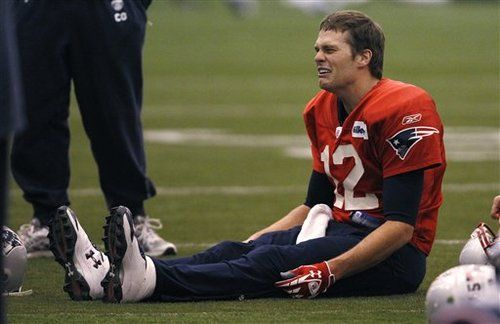